### Multivariate Linear Regression
Today we will learn how to implement multivariate linear regression. The task is to predict the price of a house based on the size of the house in square feet and the number of bedrooms in the house. so, here we have 2 independent variables and 1 dependent variable.

### Reading the dataset

In [74]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('data\ex1data2.txt', header = None, names = ['Size', 'Bedrooms', 'Price'])
df.head()

Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

### Since the scale of the values of the variables is vastly different, there is a need to perform 'Feature Normalization'. Otherwise, the weightage of values in size variable will be much more than the values in bedrooms variable supressing the contributions of the bedrooms feature.

In feature normalization, we adjust the scale of the features by subtracting the mean from each value of the feature and then dividing by the standard deviation or the range of the values in the feature.

In [60]:
df = (df - df.mean())/df.std()

In [61]:
df.head()

Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389

### Adding ones to the dataframe

In [62]:
df.insert(0, 'Ones', 1)
df.head()

Ones      Size  Bedrooms     Price
0     1  0.130010 -0.223675  0.475747
1     1 -0.504190 -0.223675 -0.084074
2     1  0.502476 -0.223675  0.228626
3     1 -0.735723 -1.537767 -0.867025
4     1  1.257476  1.090417  1.595389

### Setting X (training data) and y (target variable)

In [63]:
cols = df.shape[1]

In [64]:
X1 = df.iloc[:, 0:cols-1]
y1 = df.iloc[:, cols-1:cols]

### Convert to matrices and initialize theta

In [65]:
X1 = np.matrix(X1.values)
y1 = np.matrix(y1.values)

In [66]:
theta = np.matrix(np.array([0,0,0]))

In [67]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [68]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    print('temp', temp)
    parameters = int(theta.ravel().shape[1])
    print("parameters", parameters)
    cost = np.zeros(iters)
    print("cost", cost)
    
    for i in range(iters):
        error = (X * theta.T) - y
        print("error", error)
        
        for j in range(parameters):
            term  = np.multiply(error, X[:,j])
            print('term', term)
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
            print('temp[0,j]', temp[0,j])
        theta = temp
        print('theta', theta)
        cost[i] = computeCost(X1, y1, theta)
        print('cost[i]', cost[i])
        
    return theta, cost

### Initialize variables for learning rate and iterations

In [69]:
alpha = 0.01  
iters = 1000

In [70]:
# perform linear regression on the dataset
g, cost = gradientDescent(X1, y1, theta, alpha, iters)

temp [[ 0.  0.  0.]]
parameters 3
cost [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.

 [-0.16263682]]
temp[0,j] 0.0394834595257
theta [[ -9.37784129e-18   7.91040367e-02   3.94834595e-02]]
cost[i] 0.411614042092
error [[-0.47429403]
 [ 0.03535952]
 [-0.19770931]
 [ 0.7481095 ]
 [-1.45286463]
 [ 0.36549042]
 [ 0.14875164]
 [ 1.06501308]
 [ 0.95635992]
 [ 0.72378525]
 [ 0.84006624]
 [-0.06158115]
 [ 0.06343414]
 [-2.53345237]
 [ 0.56213381]
 [-0.80277182]
 [ 0.19552707]
 [ 1.03879539]
 [-1.17267032]
 [-1.92242805]
 [ 0.667786  ]
 [ 0.61115072]
 [ 0.73153559]
 [ 0.6830989 ]
 [-1.68807284]
 [ 0.6253857 ]
 [-1.05523145]
 [-0.98491209]
 [-1.06534656]
 [ 0.37850509]
 [-0.15268444]
 [ 1.15145778]
 [ 0.25100336]
 [-1.81101054]
 [ 0.46013486]
 [ 0.65893041]
 [ 0.79917059]
 [ 0.01943781]
 [-1.40470128]
 [ 0.48627592]
 [-0.31885632]
 [ 0.09886553]
 [ 0.31065822]
 [ 0.24266496]
 [ 1.1086364 ]
 [ 0.3522517 ]
 [ 0.71881169]]
term [[-0.47429403]
 [ 0.03535952]
 [-0.19770931]
 [ 0.7481095 ]
 [-1.45286463]
 [ 0.36549042]
 [ 0.14875164]
 [ 1.06501308]
 [ 0.95635992]
 [ 0.72378525]
 [ 0.84

 [ -6.36815478e-01]]
temp[0,j] 0.161875433403
term [[  1.05603100e-01]
 [  2.43418429e-03]
 [  3.73786961e-02]
 [ -9.82053208e-01]
 [ -1.43833099e+00]
 [  4.38127897e-01]
 [ -2.15108755e-02]
 [ -2.24157036e-01]
 [ -1.98844273e-01]
 [ -1.49272266e-01]
 [  9.50900170e-01]
 [  1.55238054e-02]
 [ -1.00757724e-02]
 [ -5.31906152e+00]
 [ -1.08259465e-01]
 [ -8.02773196e-01]
 [ -1.18130788e-01]
 [ -2.14189346e-01]
 [ -1.17375367e+00]
 [ -1.94710394e+00]
 [ -1.42611756e-01]
 [ -8.41158108e-01]
 [ -1.53369064e-01]
 [  7.82044551e-01]
 [  3.38724875e-01]
 [ -1.18798031e-01]
 [  2.49423051e-01]
 [  2.10749442e-01]
 [  2.35744420e-01]
 [ -9.65978750e-02]
 [  3.40679756e-01]
 [ -2.72764087e+00]
 [  3.19049720e-01]
 [  3.82400442e-01]
 [  5.23105956e-01]
 [ -1.33541259e-01]
 [ -1.60655676e-01]
 [  7.61823837e-02]
 [ -1.25856044e+00]
 [  5.88372421e-01]
 [  6.22061313e-01]
 [ -2.54773277e-02]
 [  4.39293454e-01]
 [ -3.53412979e-02]
 [ -1.45315532e+00]
 [  4.09762495e-01]
 [ -1.41907958e-01]]
temp[0,j

 [-0.12151257]]
temp[0,j] 0.109341825383
theta [[ -3.41806961e-17   2.44318568e-01   1.09341825e-01]]
cost[i] 0.287290273336
error [[-0.46844009]
 [-0.06356555]
 [-0.13031849]
 [ 0.51913148]
 [-1.16893661]
 [ 0.43840516]
 [ 0.03610551]
 [ 0.9301222 ]
 [ 0.81169799]
 [ 0.60282333]
 [ 0.90362572]
 [-0.07734828]
 [ 0.02479858]
 [-1.85045544]
 [ 0.39418765]
 [-0.66437019]
 [-0.05340886]
 [ 0.86419659]
 [-0.97002918]
 [-1.63205528]
 [ 0.60357937]
 [ 0.48029907]
 [ 0.63344209]
 [ 0.75123207]
 [-1.31091869]
 [ 0.4225132 ]
 [-1.18367759]
 [-0.89132653]
 [-1.03953471]
 [ 0.49516698]
 [-0.29372295]
 [ 0.7441952 ]
 [ 0.33535233]
 [-1.59040122]
 [ 0.4968759 ]
 [ 0.52611848]
 [ 0.62519548]
 [ 0.1229131 ]
 [-0.868181  ]
 [ 0.59598806]
 [-0.49627642]
 [ 0.13257738]
 [ 0.50456778]
 [ 0.06058195]
 [ 0.76240567]
 [ 0.39751644]
 [ 0.53735236]]
term [[-0.46844009]
 [-0.06356555]
 [-0.13031849]
 [ 0.51913148]
 [-1.16893661]
 [ 0.43840516]
 [ 0.03610551]
 [ 0.9301222 ]
 [ 0.81169799]
 [ 0.60282333]
 [ 0.903

 [ 0.46215161]]
temp[0,j] -4.80230512567e-17
term [[ -6.03832522e-02]
 [  5.23720557e-02]
 [ -5.04054335e-02]
 [ -3.18373832e-01]
 [ -1.32824956e+00]
 [ -9.11310768e-03]
 [  5.87440107e-03]
 [ -6.31363951e-01]
 [ -5.87371420e-01]
 [ -3.52704665e-01]
 [ -7.04860877e-02]
 [  7.06809173e-05]
 [ -1.38977499e-03]
 [ -4.91903373e+00]
 [ -2.99359024e-01]
 [ -2.30972354e-01]
 [  1.26972581e-01]
 [ -7.61980739e-01]
 [ -6.82598414e-01]
 [ -1.96634704e+00]
 [ -1.69944901e-01]
 [ -6.17336643e-02]
 [ -2.96242162e-01]
 [ -3.76077741e-02]
 [ -2.73389886e+00]
 [ -3.83368734e-01]
 [  8.44349495e-01]
 [ -5.62036175e-01]
 [ -2.57608867e-01]
 [  4.37184103e-01]
 [  6.97707011e-02]
 [ -7.44586015e-01]
 [  1.79912456e-02]
 [ -2.13854043e+00]
 [ -1.20540952e-01]
 [ -3.34422804e-01]
 [ -5.30173916e-01]
 [  2.63196577e-02]
 [ -1.80761516e+00]
 [  1.28898634e-01]
 [  2.37618377e-01]
 [  4.42993036e-02]
 [  4.12723702e-01]
 [  1.49944396e-02]
 [ -9.05470312e-01]
 [ -7.65707395e-02]
 [ -4.63883723e-01]]
temp[0,j]

cost[i] 0.213074454979
error [[-0.45817632]
 [-0.14978394]
 [-0.0633906 ]
 [ 0.34178937]
 [-0.93124891]
 [ 0.48178851]
 [-0.06274745]
 [ 0.81078593]
 [ 0.68336437]
 [ 0.49631306]
 [ 0.93839458]
 [-0.08699352]
 [-0.00590428]
 [-1.27392991]
 [ 0.24441355]
 [-0.5606855 ]
 [-0.24912853]
 [ 0.70829664]
 [-0.80719174]
 [-1.38843317]
 [ 0.54933027]
 [ 0.39331326]
 [ 0.54798944]
 [ 0.79021246]
 [-0.95875583]
 [ 0.24057838]
 [-1.29707944]
 [-0.80027809]
 [-1.01089339]
 [ 0.60746447]
 [-0.39008896]
 [ 0.43131694]
 [ 0.38926448]
 [-1.3823873 ]
 [ 0.50694992]
 [ 0.40869653]
 [ 0.46986983]
 [ 0.19443707]
 [-0.39790238]
 [ 0.67325502]
 [-0.62614319]
 [ 0.16849315]
 [ 0.65936504]
 [-0.10220959]
 [ 0.47709543]
 [ 0.41543921]
 [ 0.37513513]]
term [[-0.45817632]
 [-0.14978394]
 [-0.0633906 ]
 [ 0.34178937]
 [-0.93124891]
 [ 0.48178851]
 [-0.06274745]
 [ 0.81078593]
 [ 0.68336437]
 [ 0.49631306]
 [ 0.93839458]
 [-0.08699352]
 [-0.00590428]
 [-1.27392991]
 [ 0.24441355]
 [-0.5606855 ]
 [-0.24912853]
 [ 0.

 [ -3.50646924e-01]]
temp[0,j] 0.424618870992
term [[  1.01969407e-01]
 [  3.65045536e-02]
 [  1.16013475e-02]
 [ -4.87762335e-01]
 [ -9.76548338e-01]
 [  5.29743064e-01]
 [  1.74969305e-02]
 [ -1.77144598e-01]
 [ -1.48315782e-01]
 [ -1.07272074e-01]
 [  1.02610397e+00]
 [  1.96703158e-02]
 [  2.29979920e-03]
 [ -2.85349725e+00]
 [ -4.93522931e-02]
 [ -5.96278465e-01]
 [  4.25534452e-01]
 [ -1.52888264e-01]
 [ -8.54567559e-01]
 [ -1.47401568e+00]
 [ -1.21034598e-01]
 [ -5.89624541e-01]
 [ -1.19597933e-01]
 [  8.65271686e-01]
 [  2.01481151e-01]
 [ -4.73228376e-02]
 [  2.94116390e-01]
 [  1.75546078e-01]
 [  2.24929001e-01]
 [ -1.40105110e-01]
 [  6.17414823e-01]
 [ -1.10738136e+00]
 [  4.30723223e-01]
 [  3.01488383e-01]
 [  5.51263839e-01]
 [ -8.72769169e-02]
 [ -9.95790235e-02]
 [  2.21408014e-01]
 [ -3.53670892e-01]
 [  7.44538962e-01]
 [  9.88801737e-01]
 [ -3.91355134e-02]
 [  7.43162293e-01]
 [  2.86529305e-02]
 [ -6.68790034e-01]
 [  4.52872957e-01]
 [ -7.81381591e-02]]
temp[0,j

 [-0.06530575]]
temp[0,j] 0.161774353806
theta [[ -8.39281363e-17   4.79945299e-01   1.61774354e-01]]
cost[i] 0.185803667592
error [[-0.44953415]
 [-0.19409401]
 [-0.02364949]
 [ 0.26514645]
 [-0.81546835]
 [ 0.49092914]
 [-0.11399174]
 [ 0.74829979]
 [ 0.61594022]
 [ 0.4408662 ]
 [ 0.94280734]
 [-0.089278  ]
 [-0.0197458 ]
 [-0.98986371]
 [ 0.16522224]
 [-0.51844972]
 [-0.33585758]
 [ 0.62574329]
 [-0.73249119]
 [-1.26939562]
 [ 0.52256588]
 [ 0.36626054]
 [ 0.50409962]
 [ 0.79693662]
 [-0.7624694 ]
 [ 0.14373632]
 [-1.3563086 ]
 [-0.74729892]
 [-0.99216507]
 [ 0.67210574]
 [-0.42228981]
 [ 0.29796633]
 [ 0.40418363]
 [-1.26521404]
 [ 0.49780942]
 [ 0.34726103]
 [ 0.38763166]
 [ 0.21902211]
 [-0.15446909]
 [ 0.70099197]
 [-0.67673024]
 [ 0.1912139 ]
 [ 0.72965291]
 [-0.18854525]
 [ 0.34119643]
 [ 0.41060633]
 [ 0.28911466]]
term [[-0.44953415]
 [-0.19409401]
 [-0.02364949]
 [ 0.26514645]
 [-0.81546835]
 [ 0.49092914]
 [-0.11399174]
 [ 0.74829979]
 [ 0.61594022]
 [ 0.4408662 ]
 [ 0.942

term [[-0.44650821]
 [-0.20634111]
 [-0.01165366]
 [ 0.24670659]
 [-0.78467344]
 [ 0.49096584]
 [-0.12823888]
 [ 0.73081016]
 [ 0.59702632]
 [ 0.42540692]
 [ 0.94148037]
 [-0.08940364]
 [-0.02320484]
 [-0.91366311]
 [ 0.14291433]
 [-0.50886736]
 [-0.3572066 ]
 [ 0.60246566]
 [-0.713545  ]
 [-1.2376613 ]
 [ 0.5153795 ]
 [ 0.36212401]
 [ 0.49197374]
 [ 0.79627634]
 [-0.70532113]
 [ 0.1163374 ]
 [-1.37285881]
 [-0.73148483]
 [-0.98622998]
 [ 0.69128353]
 [-0.42791123]
 [ 0.26630326]
 [ 0.40588703]
 [-1.23088442]
 [ 0.49257329]
 [ 0.33007444]
 [ 0.36444495]
 [ 0.22351345]
 [-0.08685523]
 [ 0.70639242]
 [-0.68765479]
 [ 0.19830053]
 [ 0.74732634]
 [-0.21291381]
 [ 0.30566531]
 [ 0.40661265]
 [ 0.26483701]]
temp[0,j] -8.95619276142e-17
term [[ -5.80504733e-02]
 [  1.04035090e-01]
 [ -5.85568892e-03]
 [ -1.81507727e-01]
 [ -9.86708025e-01]
 [ -9.68760466e-03]
 [  7.53069740e-02]
 [ -5.27558262e-01]
 [ -4.66291315e-01]
 [ -2.71228012e-01]
 [ -7.18883366e-02]
 [  7.65954225e-05]
 [  3.23181528e

 [ 0.2293514 ]]
term [[-0.44149469]
 [-0.22398193]
 [ 0.00666478]
 [ 0.22296542]
 [-0.74155583]
 [ 0.48846012]
 [-0.14884634]
 [ 0.70539314]
 [ 0.5694967 ]
 [ 0.40300149]
 [ 0.93695195]
 [-0.08906483]
 [-0.02781043]
 [-0.80628105]
 [ 0.11035041]
 [-0.49721412]
 [-0.38526288]
 [ 0.56846337]
 [-0.68800249]
 [-1.19315027]
 [ 0.50524517]
 [ 0.3595988 ]
 [ 0.47451271]
 [ 0.79273679]
 [-0.62002856]
 [ 0.07622203]
 [-1.39688241]
 [-0.70750281]
 [-0.97690135]
 [ 0.7202549 ]
 [-0.43263894]
 [ 0.22603356]
 [ 0.40585351]
 [-1.17943851]
 [ 0.48224643]
 [ 0.30510691]
 [ 0.3305775 ]
 [ 0.22761525]
 [ 0.0108755 ]
 [ 0.71184269]
 [-0.70024859]
 [ 0.20933722]
 [ 0.77098099]
 [-0.24853426]
 [ 0.25657286]
 [ 0.3981287 ]
 [ 0.2293514 ]]
temp[0,j] -9.69082969899e-17
term [[ -5.73986673e-02]
 [  1.12929415e-01]
 [  3.34889407e-03]
 [ -1.64040802e-01]
 [ -9.32488676e-01]
 [ -9.63816253e-03]
 [  8.74084976e-02]
 [ -5.09210191e-01]
 [ -4.44790045e-01]
 [ -2.56942914e-01]
 [ -7.15425610e-02]
 [  7.63051538e-05]

theta [[ -1.02235005e-16   5.66889486e-01   1.57243728e-01]]
cost[i] 0.165143669755
error [[-0.43721716]
 [-0.236917  ]
 [ 0.0210513 ]
 [ 0.20814665]
 [-0.71107839]
 [ 0.48427331]
 [-0.16403544]
 [ 0.68654978]
 [ 0.5490482 ]
 [ 0.38644632]
 [ 0.93122829]
 [-0.0883391 ]
 [-0.03084142]
 [-0.72972724]
 [ 0.08607689]
 [-0.49064306]
 [-0.40336023]
 [ 0.54309698]
 [-0.67087847]
 [-1.16161412]
 [ 0.49801349]
 [ 0.36089977]
 [ 0.46171425]
 [ 0.78776448]
 [-0.55475559]
 [ 0.04621098]
 [-1.41466705]
 [-0.68881314]
 [-0.96934523]
 [ 0.74273544]
 [-0.43301141]
 [ 0.20140783]
 [ 0.40354506]
 [-1.13988198]
 [ 0.47211718]
 [ 0.28660508]
 [ 0.30531357]
 [ 0.22844877]
 [ 0.0828476 ]
 [ 0.71370078]
 [-0.70659766]
 [ 0.21819112]
 [ 0.78667063]
 [-0.27513012]
 [ 0.22249237]
 [ 0.38939967]
 [ 0.202858  ]]
term [[-0.43721716]
 [-0.236917  ]
 [ 0.0210513 ]
 [ 0.20814665]
 [-0.71107839]
 [ 0.48427331]
 [-0.16403544]
 [ 0.68654978]
 [ 0.5490482 ]
 [ 0.38644632]
 [ 0.93122829]
 [-0.0883391 ]
 [-0.03084142]
 [-0

 [ 0.1715037 ]]
temp[0,j] -1.10514434483e-16
term [[ -5.60929124e-02]
 [  1.27013138e-01]
 [  1.96026913e-02]
 [ -1.43050345e-01]
 [ -8.51645058e-01]
 [ -9.39761643e-03]
 [  1.06732525e-01]
 [ -4.79635369e-01]
 [ -4.10026255e-01]
 [ -2.34040922e-01]
 [ -7.03527998e-02]
 [  7.44143288e-05]
 [  4.72025582e-03]
 [ -2.00719157e+00]
 [ -5.29207732e-02]
 [ -1.82924023e-01]
 [  3.60619265e-01]
 [ -4.93718766e-01]
 [ -4.99983987e-01]
 [ -1.46052073e+00]
 [ -1.44052896e-01]
 [ -5.19850475e-02]
 [ -2.23063430e-01]
 [ -3.79074572e-02]
 [ -1.13023187e+00]
 [ -1.20285198e-02]
 [  9.80274982e-01]
 [ -4.40019555e-01]
 [ -2.40683156e-01]
 [  6.16908639e-01]
 [  8.73395178e-02]
 [ -2.25929771e-01]
 [  1.96821265e-02]
 [ -1.56078267e+00]
 [ -1.09064267e-01]
 [ -1.87886916e-01]
 [ -2.63997242e-01]
 [  3.74277482e-02]
 [  4.64532771e-01]
 [  1.44731893e-01]
 [  3.00835092e-01]
 [  6.85281283e-02]
 [  5.71978802e-01]
 [  3.08914610e-01]
 [ -2.68190302e-01]
 [ -7.03301556e-02]
 [ -1.72146484e-01]]
temp[0,j]

term [[  9.58786184e-02]
 [  5.77889299e-02]
 [ -1.05669195e-02]
 [ -2.92066889e-01]
 [ -7.23321059e-01]
 [  5.14208955e-01]
 [  4.23661499e-02]
 [ -1.46463587e-01]
 [ -1.15081928e-01]
 [ -8.02302228e-02]
 [  9.98654332e-01]
 [  1.92283705e-02]
 [  7.83259230e-03]
 [ -1.46234917e+00]
 [ -1.00350699e-02]
 [ -5.28403867e-01]
 [  6.57078329e-01]
 [ -1.11832936e-01]
 [ -7.04872992e-01]
 [ -1.21257992e+00]
 [ -1.08820961e-01]
 [ -5.70183880e-01]
 [ -9.85308199e-02]
 [  8.43647418e-01]
 [  9.83823363e-02]
 [  1.11944073e-03]
 [  3.23113611e-01]
 [  1.46534020e-01]
 [  2.13623895e-01]
 [ -1.75146223e-01]
 [  6.55153121e-01]
 [ -4.92238810e-01]
 [  4.29752540e-01]
 [  2.39289368e-01]
 [  4.89656349e-01]
 [ -5.71390646e-02]
 [ -5.86866420e-02]
 [  2.44797968e-01]
 [  2.21275684e-01]
 [  7.75872603e-01]
 [  1.09188874e+00]
 [ -5.25046201e-02]
 [  8.81735699e-01]
 [  7.16636284e-02]
 [ -2.62485058e-01]
 [  4.02121838e-01]
 [ -3.52904086e-02]]
temp[0,j] 0.145980045704
theta [[ -1.12947476e-16   6.

 [ -1.34038286e-01]]
temp[0,j] 0.641707359886
term [[ 0.09466817]
 [ 0.06028815]
 [-0.01395606]
 [-0.28374839]
 [-0.69815714]
 [ 0.50295246]
 [ 0.04535116]
 [-0.14269101]
 [-0.11096341]
 [-0.0769508 ]
 [ 0.98578313]
 [ 0.01878341]
 [ 0.00819728]
 [-1.31833151]
 [-0.00509218]
 [-0.52835748]
 [ 0.67025472]
 [-0.10665451]
 [-0.69373901]
 [-1.18630366]
 [-0.10755094]
 [-0.58575003]
 [-0.09606104]
 [ 0.83156563]
 [ 0.08402613]
 [ 0.00729888]
 [ 0.32665801]
 [ 0.14221746]
 [ 0.21170685]
 [-0.18027979]
 [ 0.64206652]
 [-0.47147758]
 [ 0.42046956]
 [ 0.23047558]
 [ 0.47215635]
 [-0.05344009]
 [-0.0535303 ]
 [ 0.23881615]
 [ 0.29003645]
 [ 0.77096725]
 [ 1.08765767]
 [-0.05470137]
 [ 0.89136263]
 [ 0.07710703]
 [-0.22562642]
 [ 0.38609301]
 [-0.02986909]]
temp[0,j] 0.136930835709
theta [[ -1.17305692e-16   6.41707360e-01   1.36930836e-01]]
cost[i] 0.151958779991
error [[-0.42294661]
 [-0.27009592]
 [ 0.063189  ]
 [ 0.18433791]
 [-0.63914622]
 [ 0.46064751]
 [-0.20342798]
 [ 0.63708364]
 [ 0.495

temp[0,j] -1.20163926091e-16
term [[ -5.46494872e-02]
 [  1.38603014e-01]
 [  3.52414028e-02]
 [ -1.34764613e-01]
 [ -7.91870197e-01]
 [ -8.98094174e-03]
 [  1.22852983e-01]
 [ -4.54594384e-01]
 [ -3.80450874e-01]
 [ -2.14813785e-01]
 [ -6.85079685e-02]
 [  7.09290574e-05]
 [  5.18990021e-03]
 [ -1.62272330e+00]
 [ -1.10243628e-02]
 [ -1.82852843e-01]
 [  3.75827067e-01]
 [ -4.47909869e-01]
 [ -4.83840937e-01]
 [ -1.39617314e+00]
 [ -1.40615007e-01]
 [ -5.49148704e-02]
 [ -2.11724304e-01]
 [ -3.68039020e-02]
 [ -8.16644550e-01]
 [  5.23530614e-02]
 [  1.00253099e+00]
 [ -4.13812727e-01]
 [ -2.36269987e-01]
 [  6.54664492e-01]
 [  8.38099234e-02]
 [ -2.06753647e-01]
 [  1.88213876e-02]
 [ -1.44500273e+00]
 [ -1.01214982e-01]
 [ -1.63762183e-01]
 [ -2.18562545e-01]
 [  3.55812874e-02]
 [  8.25966334e-01]
 [  1.42875508e-01]
 [  2.98499813e-01]
 [  7.45502058e-02]
 [  5.84982890e-01]
 [  3.59333405e-01]
 [ -1.96772165e-01]
 [ -6.46963441e-02]
 [ -1.22120273e-01]]
temp[0,j] 0.654631649548


 [  1.08691732e-01]]
term [[ -4.16993641e-01]
 [ -2.80680662e-01]
 [  7.88545914e-02]
 [  1.82771831e-01]
 [ -6.18849121e-01]
 [  4.47639502e-01]
 [ -2.16178377e-01]
 [  6.20822266e-01]
 [  4.77353622e-01]
 [  3.29225031e-01]
 [  8.88881346e-01]
 [ -8.13192894e-02]
 [ -3.77870619e-02]
 [ -4.91602262e-01]
 [  1.62937473e-04]
 [ -4.87284879e-01]
 [ -4.40923090e-01]
 [  4.53120354e-01]
 [ -6.28290052e-01]
 [ -1.06544913e+00]
 [  4.75451924e-01]
 [  3.95449454e-01]
 [  4.18458425e-01]
 [  7.48210623e-01]
 [ -3.07783841e-01]
 [ -6.10320326e-02]
 [ -1.47645885e+00]
 [ -6.15013051e-01]
 [ -9.36933676e-01]
 [  8.30627945e-01]
 [ -4.04682710e-01]
 [  1.64967434e-01]
 [  3.73893980e-01]
 [ -9.88510132e-01]
 [  4.13392556e-01]
 [  2.22147147e-01]
 [  2.15717820e-01]
 [  2.10477894e-01]
 [  3.29331684e-01]
 [  6.99538663e-01]
 [ -7.00486731e-01]
 [  2.55427102e-01]
 [  8.23926779e-01]
 [ -3.69677262e-01]
 [  1.25512847e-01]
 [  3.35880361e-01]
 [  1.08691732e-01]]
temp[0,j] -1.22726887754e-16
term

 [ 0.09600769]]
term [[-0.41350155]
 [-0.28623715]
 [ 0.08766092]
 [ 0.18353011]
 [-0.60888889]
 [ 0.4393769 ]
 [-0.2229198 ]
 [ 0.61215981]
 [ 0.46784736]
 [ 0.32176547]
 [ 0.87981083]
 [-0.07969437]
 [-0.03813703]
 [-0.46472494]
 [-0.01135412]
 [-0.48989212]
 [-0.44188835]
 [ 0.44102878]
 [-0.62534966]
 [-1.05493234]
 [ 0.47289367]
 [ 0.4046818 ]
 [ 0.41297375]
 [ 0.73953509]
 [-0.27222675]
 [-0.07556529]
 [-1.48456474]
 [-0.60394457]
 [-0.93171805]
 [ 0.84368926]
 [-0.39633008]
 [ 0.16787527]
 [ 0.36661882]
 [-0.96647205]
 [ 0.40200604]
 [ 0.21366423]
 [ 0.20368011]
 [ 0.20485446]
 [ 0.36110545]
 [ 0.69445383]
 [-0.69527597]
 [ 0.26132496]
 [ 0.82611313]
 [-0.38241516]
 [ 0.11614534]
 [ 0.32522994]
 [ 0.09600769]]
temp[0,j] -1.26104800361e-16
term [[ -5.37592828e-02]
 [  1.44317864e-01]
 [  4.40475421e-02]
 [ -1.35027338e-01]
 [ -7.65663181e-01]
 [ -8.66966563e-03]
 [  1.30907379e-01]
 [ -4.41906787e-01]
 [ -3.65399565e-01]
 [ -2.05149009e-01]
 [ -6.71794538e-02]
 [  6.82771297e-05]

theta [[ -1.27628404e-16   6.94136576e-01   1.11359475e-01]]
cost[i] 0.144527949734
error [[-0.41041061]
 [-0.29081052]
 [ 0.09525312]
 [ 0.18508732]
 [-0.60110117]
 [ 0.43172956]
 [-0.22849683]
 [ 0.60495564]
 [ 0.45992846]
 [ 0.31558016]
 [ 0.87147918]
 [-0.07818495]
 [-0.03830038]
 [-0.44338999]
 [-0.0209762 ]
 [-0.49274927]
 [-0.44179101]
 [ 0.43092008]
 [-0.62350785]
 [-1.0466732 ]
 [ 0.47085987]
 [ 0.41341669]
 [ 0.40846121]
 [ 0.73153799]
 [-0.24197618]
 [-0.08774213]
 [-1.4912975 ]
 [-0.5944363 ]
 [-0.92716724]
 [ 0.85488551]
 [-0.38834033]
 [ 0.17203504]
 [ 0.35980786]
 [-0.94767232]
 [ 0.39171268]
 [ 0.20661213]
 [ 0.19361703]
 [ 0.19944254]
 [ 0.38736963]
 [ 0.68949812]
 [-0.68994744]
 [ 0.26645364]
 [ 0.82731624]
 [-0.39307131]
 [ 0.10912582]
 [ 0.31556007]
 [ 0.08539716]]
term [[-0.41041061]
 [-0.29081052]
 [ 0.09525312]
 [ 0.18508732]
 [-0.60110117]
 [ 0.43172956]
 [-0.22849683]
 [ 0.60495564]
 [ 0.45992846]
 [ 0.31558016]
 [ 0.87147918]
 [-0.07818495]
 [-0.03830038]
 [-0

temp[0,j] 0.100684687281
theta [[ -1.29825229e-16   7.11424783e-01   1.00684687e-01]]
cost[i] 0.142358495789
error [[-0.40577529]
 [-0.29713937]
 [ 0.10632773]
 [ 0.18878332]
 [-0.59100163]
 [ 0.41974846]
 [-0.23626146]
 [ 0.59486329]
 [ 0.44881365]
 [ 0.30694535]
 [ 0.85851914]
 [-0.07581208]
 [-0.03832048]
 [-0.41516522]
 [-0.03452749]
 [-0.49787775]
 [-0.44018342]
 [ 0.41667265]
 [-0.62191425]
 [-1.03589928]
 [ 0.46816399]
 [ 0.42738073]
 [ 0.40221937]
 [ 0.71905655]
 [-0.19848765]
 [-0.10494815]
 [-1.50071546]
 [-0.58062065]
 [-0.9204435 ]
 [ 0.87111589]
 [-0.37544226]
 [ 0.18070889]
 [ 0.34902326]
 [-0.92056479]
 [ 0.37594634]
 [ 0.19673732]
 [ 0.17943486]
 [ 0.19065933]
 [ 0.42390066]
 [ 0.68136755]
 [-0.68085637]
 [ 0.27400404]
 [ 0.82799616]
 [-0.4081019 ]
 [ 0.10055239]
 [ 0.30068565]
 [ 0.07043184]]
term [[-0.40577529]
 [-0.29713937]
 [ 0.10632773]
 [ 0.18878332]
 [-0.59100163]
 [ 0.41974846]
 [-0.23626146]
 [ 0.59486329]
 [ 0.44881365]
 [ 0.30694535]
 [ 0.85851914]
 [-0.0758

 [-0.01341332]]
temp[0,j] 0.0918933210874
theta [[ -1.31230724e-16   7.24466365e-01   9.18933211e-02]]
cost[i] 0.140815196002
error [[-0.40211335]
 [-0.30174839]
 [ 0.11484722]
 [ 0.1927074 ]
 [-0.58418841]
 [ 0.40990488]
 [-0.24195359]
 [ 0.58741523]
 [ 0.44059429]
 [ 0.3005968 ]
 [ 0.84793708]
 [-0.07385684]
 [-0.03817041]
 [-0.39564971]
 [-0.04458485]
 [-0.50255198]
 [-0.43783476]
 [ 0.40609016]
 [-0.62151759]
 [-1.02857733]
 [ 0.46629554]
 [ 0.43905064]
 [ 0.39767599]
 [ 0.70883552]
 [-0.16551628]
 [-0.11776249]
 [-1.5076548 ]
 [-0.57003341]
 [-0.91520614]
 [ 0.88352471]
 [-0.36457647]
 [ 0.18935881]
 [ 0.34008226]
 [-0.89995064]
 [ 0.3632473 ]
 [ 0.18945336]
 [ 0.1689016 ]
 [ 0.18322811]
 [ 0.45065283]
 [ 0.67442865]
 [-0.67286245]
 [ 0.27986501]
 [ 0.82770357]
 [-0.41927518]
 [ 0.09522086]
 [ 0.28865945]
 [ 0.05930779]]
term [[-0.40211335]
 [-0.30174839]
 [ 0.11484722]
 [ 0.1927074 ]
 [-0.58418841]
 [ 0.40990488]
 [-0.24195359]
 [ 0.58741523]
 [ 0.44059429]
 [ 0.3005968 ]
 [ 0.84

temp[0,j] 0.73345654939
term [[ 0.08940755]
 [ 0.06813082]
 [-0.02691227]
 [-0.30092633]
 [-0.63268418]
 [ 0.43978107]
 [ 0.05490974]
 [-0.13035058]
 [-0.09740105]
 [-0.06635227]
 [ 0.91690831]
 [ 0.01622664]
 [ 0.00850036]
 [-0.9234704 ]
 [ 0.01138203]
 [-0.55160475]
 [ 0.67023586]
 [-0.08934835]
 [-0.67782264]
 [-1.11690165]
 [-0.10405003]
 [-0.68729345]
 [-0.08832237]
 [ 0.76547915]
 [ 0.032332  ]
 [ 0.02814086]
 [ 0.33819249]
 [ 0.12598543]
 [ 0.20395035]
 [-0.19939767]
 [ 0.54928138]
 [-0.55828231]
 [ 0.36426905]
 [ 0.1983584 ]
 [ 0.38693165]
 [-0.04135965]
 [-0.03630213]
 [ 0.19427602]
 [ 0.5095024 ]
 [ 0.73022941]
 [ 1.02615211]
 [-0.06344581]
 [ 0.90195579]
 [ 0.09534914]
 [-0.14199477]
 [ 0.30606478]
 [-0.01170497]]
temp[0,j] 0.0854702615874
theta [[ -1.32612597e-16   7.33456549e-01   8.54702616e-02]]
cost[i] 0.139799915171
error [[-0.39950785]
 [-0.30484448]
 [ 0.12080126]
 [ 0.19597028]
 [-0.57988727]
 [ 0.40272368]
 [-0.24579631]
 [ 0.58236206]
 [ 0.43500943]
 [ 0.29630158]

 [ 0.04193155]]
term [[-0.39601672]
 [-0.30878199]
 [ 0.12865525]
 [ 0.20088433]
 [-0.57475326]
 [ 0.39289722]
 [-0.25070662]
 [ 0.57587464]
 [ 0.42782925]
 [ 0.29080169]
 [ 0.82975708]
 [-0.07046963]
 [-0.03764892]
 [-0.36771378]
 [-0.06026771]
 [-0.51135326]
 [-0.43215883]
 [ 0.38957363]
 [-0.62226879]
 [-1.01833457]
 [ 0.46361264]
 [ 0.45952412]
 [ 0.39074661]
 [ 0.69122866]
 [-0.11289075]
 [-0.1378221 ]
 [-1.51838778]
 [-0.55294283]
 [-0.90660852]
 [ 0.90350706]
 [-0.34537954]
 [ 0.20670219]
 [ 0.32450746]
 [-0.86694228]
 [ 0.34170659]
 [ 0.17817329]
 [ 0.15246322]
 [ 0.1700501 ]
 [ 0.49174118]
 [ 0.6620322 ]
 [-0.65822462]
 [ 0.2894526 ]
 [ 0.82585819]
 [-0.43672958]
 [ 0.08870445]
 [ 0.26818687]
 [ 0.04193155]]
temp[0,j] -1.3433698598e-16
term [[ -5.14860819e-02]
 [  1.55684741e-01]
 [  6.46462199e-02]
 [ -1.47795235e-01]
 [ -7.22738444e-01]
 [ -7.75254129e-03]
 [  1.47224904e-01]
 [ -4.15713190e-01]
 [ -3.34144503e-01]
 [ -1.85407339e-01]
 [ -6.33575143e-02]
 [  6.03739495e-05]


term [[-0.39406901]
 [-0.31088421]
 [ 0.13298149]
 [ 0.20386875]
 [-0.57217086]
 [ 0.38732351]
 [-0.25333919]
 [ 0.57238225]
 [ 0.4239592 ]
 [ 0.28784769]
 [ 0.82382176]
 [-0.06935762]
 [-0.03742083]
 [-0.35981997]
 [-0.06503775]
 [-0.51439576]
 [-0.42994583]
 [ 0.38454645]
 [-0.6228283 ]
 [-1.01550307]
 [ 0.46285235]
 [ 0.46630133]
 [ 0.38867653]
 [ 0.68547013]
 [-0.09659149]
 [-0.14394212]
 [-1.52163106]
 [-0.54760411]
 [-0.90388939]
 [ 0.90973774]
 [-0.33899607]
 [ 0.21290899]
 [ 0.3193757 ]
 [-0.85669381]
 [ 0.33473469]
 [ 0.17476127]
 [ 0.14746015]
 [ 0.16565762]
 [ 0.50408681]
 [ 0.65788078]
 [-0.65324738]
 [ 0.29247708]
 [ 0.82496118]
 [-0.44204604]
 [ 0.0871568 ]
 [ 0.26154443]
 [ 0.03663919]]
temp[0,j] -1.35187369573e-16
term [[ -5.12328606e-02]
 [  1.56744662e-01]
 [  6.68200540e-02]
 [ -1.49990940e-01]
 [ -7.19491135e-01]
 [ -7.64256225e-03]
 [  1.48770856e-01]
 [ -4.13192105e-01]
 [ -3.31121902e-01]
 [ -1.83523950e-01]
 [ -6.29043130e-02]
 [  5.94212509e-05]
 [  5.21172356e

 [ -2.84442975e-02]]
temp[0,j] 0.762211347818
term [[ 0.08744146]
 [ 0.07026639]
 [-0.03128727]
 [-0.32139917]
 [-0.61977976]
 [ 0.41241657]
 [ 0.05758243]
 [-0.12680709]
 [-0.09347506]
 [-0.06335405]
 [ 0.88775848]
 [ 0.01510693]
 [ 0.00827585]
 [-0.83677728]
 [ 0.01621949]
 [-0.56647201]
 [ 0.65513425]
 [-0.08425046]
 [-0.68043068]
 [-1.10276734]
 [-0.10327354]
 [-0.73417481]
 [-0.08621934]
 [ 0.73720215]
 [ 0.01583105]
 [ 0.03434554]
 [ 0.34148369]
 [ 0.12058501]
 [ 0.201203  ]
 [-0.20570143]
 [ 0.50514159]
 [-0.63737363]
 [ 0.33908661]
 [ 0.18798553]
 [ 0.3526639 ]
 [-0.03789754]
 [-0.03122866]
 [ 0.17274356]
 [ 0.57061052]
 [ 0.70988717]
 [ 0.99180361]
 [-0.06650242]
 [ 0.89768145]
 [ 0.10074   ]
 [-0.13091166]
 [ 0.27342366]
 [-0.00633853]]
temp[0,j] 0.0630405823303
theta [[ -1.35364533e-16   7.62211348e-01   6.30405823e-02]]
cost[i] 0.136840257388
error [[-0.39075248]
 [-0.31432539]
 [ 0.14026683]
 [ 0.20930633]
 [-0.5681865 ]
 [ 0.3776986 ]
 [-0.2576653 ]
 [ 0.56662147]
 [ 0.41

cost[i] 0.136279815466
error [[-0.38884082]
 [-0.31623717]
 [ 0.144424  ]
 [ 0.21262487]
 [-0.56610379]
 [ 0.37208133]
 [-0.26007777]
 [ 0.56339728]
 [ 0.41398749]
 [ 0.28026934]
 [ 0.80763484]
 [-0.06631284]
 [-0.03668543]
 [-0.34069532]
 [-0.07736082]
 [-0.52302472]
 [-0.42320516]
 [ 0.37155156]
 [-0.62497001]
 [-1.00878517]
 [ 0.46100545]
 [ 0.48496678]
 [ 0.38340755]
 [ 0.66974508]
 [-0.05386743]
 [-0.15979224]
 [-1.52996521]
 [-0.53351632]
 [-0.89664575]
 [ 0.9261559 ]
 [-0.32135934]
 [ 0.23090351]
 [ 0.30528821]
 [-0.82977848]
 [ 0.3158395 ]
 [ 0.16598623]
 [ 0.13452824]
 [ 0.15350161]
 [ 0.53566199]
 [ 0.6463546 ]
 [-0.63928466]
 [ 0.30051851]
 [ 0.82193771]
 [-0.45579673]
 [ 0.08407212]
 [ 0.24351   ]
 [ 0.02295149]]
term [[-0.38884082]
 [-0.31623717]
 [ 0.144424  ]
 [ 0.21262487]
 [-0.56610379]
 [ 0.37208133]
 [-0.26007777]
 [ 0.56339728]
 [ 0.41398749]
 [ 0.28026934]
 [ 0.80763484]
 [-0.06631284]
 [-0.03668543]
 [-0.34069532]
 [-0.07736082]
 [-0.52302472]
 [-0.42320516]
 [ 0.

 [ 0.01434957]]
temp[0,j] -1.36114523907e-16
term [[ -5.01085084e-02]
 [  1.61109812e-01]
 [  7.62726512e-02]
 [ -1.61019224e-01]
 [ -7.07609454e-01]
 [ -7.14130838e-03]
 [  1.55185869e-01]
 [ -4.02654015e-01]
 [ -3.18460003e-01]
 [ -1.75683396e-01]
 [ -6.08466053e-02]
 [  5.50714798e-05]
 [  5.03066240e-03]
 [ -1.02741653e+00]
 [  7.84542962e-02]
 [ -1.99237784e-01]
 [  3.58242871e-01]
 [ -3.49662152e-01]
 [ -4.79799357e-01]
 [ -1.30295350e+00]
 [ -1.35241301e-01]
 [ -7.05402759e-02]
 [ -1.89757402e-01]
 [ -3.20892375e-02]
 [ -6.32790602e-02]
 [  1.92408158e-01]
 [  1.04832266e+00]
 [ -3.46685548e-01]
 [ -2.23708512e-01]
 [  7.50006974e-01]
 [  6.29635296e-02]
 [ -3.06713314e-01]
 [  1.46381787e-02]
 [ -1.16187504e+00]
 [ -7.24056388e-02]
 [ -1.13846985e-01]
 [ -1.21154210e-01]
 [  2.40101231e-02]
 [  1.54713596e+00]
 [  1.29622307e-01]
 [  2.66794328e-01]
 [  9.12980146e-02]
 [  5.84020327e-01]
 [  4.67932622e-01]
 [ -1.19652568e-01]
 [ -4.33252008e-02]
 [ -1.44033477e-02]]
temp[0,j]

 [ 0.00985469]]
term [[-0.38359504]
 [-0.32125183]
 [ 0.15569576]
 [ 0.22232601]
 [-0.56107888]
 [ 0.35644283]
 [-0.26643607]
 [ 0.55486068]
 [ 0.40449406]
 [ 0.27309673]
 [ 0.79108023]
 [-0.06318429]
 [-0.03579626]
 [-0.32404291]
 [-0.08913436]
 [-0.53225044]
 [-0.41545839]
 [ 0.35912657]
 [-0.6279051 ]
 [-1.00312916]
 [ 0.45939058]
 [ 0.50427692]
 [ 0.37847432]
 [ 0.65363834]
 [-0.01226218]
 [-0.17498592]
 [-1.53787071]
 [-0.51967943]
 [-0.88944559]
 [ 0.94225252]
 [-0.30304675]
 [ 0.25059739]
 [ 0.29076941]
 [-0.80350284]
 [ 0.2966587 ]
 [ 0.15765321]
 [ 0.12216433]
 [ 0.14085574]
 [ 0.56542192]
 [ 0.63431947]
 [-0.62453472]
 [ 0.30849228]
 [ 0.81814759]
 [-0.4689546 ]
 [ 0.08229133]
 [ 0.22516388]
 [ 0.00985469]]
temp[0,j] -1.35819251826e-16
term [[ -4.98711403e-02]
 [  1.61971909e-01]
 [  7.82334416e-02]
 [ -1.63570377e-01]
 [ -7.05543239e-01]
 [ -7.03323311e-03]
 [  1.56461862e-01]
 [ -4.00543604e-01]
 [ -3.15919179e-01]
 [ -1.74119128e-01]
 [ -6.04042775e-02]
 [  5.41323297e-05]

 [ -3.63311943e-03]]
temp[0,j] 0.792600488324
term [[  8.52249857e-02]
 [  7.23825294e-02]
 [ -3.60482919e-02]
 [ -3.49626896e-01]
 [ -6.09468390e-01]
 [  3.80191662e-01]
 [  6.02659346e-02]
 [ -1.23203775e-01]
 [ -8.94677116e-02]
 [ -6.03266895e-02]
 [  8.53647730e-01]
 [  1.37844840e-02]
 [  7.89901451e-03]
 [ -7.61344936e-01]
 [  2.11896429e-02]
 [ -5.85496000e-01]
 [  6.32580174e-01]
 [ -7.90052238e-02]
 [ -6.86505205e-01]
 [ -1.09115684e+00]
 [ -1.02593012e-01]
 [ -7.90297991e-01]
 [ -8.41375953e-02]
 [  7.04013367e-01]
 [ -1.73867105e-03]
 [  4.07598976e-02]
 [  3.44820518e-01]
 [  1.14740839e-01]
 [  1.98161266e-01]
 [ -2.12499805e-01]
 [  4.51914330e-01]
 [ -7.43625291e-01]
 [  3.09166623e-01]
 [  1.76888928e-01]
 [  3.13147062e-01]
 [ -3.43801896e-02]
 [ -2.60092114e-02]
 [  1.46679083e-01]
 [  6.31839687e-01]
 [  6.85079924e-01]
 [  9.48918947e-01]
 [ -6.98708107e-02]
 [  8.89846798e-01]
 [  1.06294714e-01]
 [ -1.25806686e-01]
 [  2.35625033e-01]
 [ -8.09604319e-04]]
temp[0,j

 [  7.10714393e-04]]
temp[0,j] -1.33959037716e-16
term [[ -4.93783873e-02]
 [  1.63708809e-01]
 [  8.22729885e-02]
 [ -1.69064029e-01]
 [ -7.01646165e-01]
 [ -6.80688124e-03]
 [  1.59041242e-01]
 [ -3.96264008e-01]
 [ -3.10762014e-01]
 [ -1.70952564e-01]
 [ -5.94790287e-02]
 [  5.21642564e-05]
 [  4.88545307e-03]
 [ -9.76585254e-01]
 [  8.97480537e-02]
 [ -2.03085954e-01]
 [  3.50634380e-01]
 [ -3.37217118e-01]
 [ -4.82565423e-01]
 [ -1.29594632e+00]
 [ -1.34774959e-01]
 [ -7.35208990e-02]
 [ -1.87227020e-01]
 [ -3.12403631e-02]
 [  4.08113602e-02]
 [  2.10360525e-01]
 [  1.05391498e+00]
 [ -3.37011955e-01]
 [ -2.21785441e-01]
 [  7.63623955e-01]
 [  5.88998042e-02]
 [ -3.34498557e-01]
 [  1.38577685e-02]
 [ -1.12227982e+00]
 [ -6.74727695e-02]
 [ -1.07719944e-01]
 [ -1.08819448e-01]
 [  2.17285693e-02]
 [  1.63269731e+00]
 [  1.26949671e-01]
 [  2.59916511e-01]
 [  9.38302250e-02]
 [  5.80805622e-01]
 [  4.81738672e-01]
 [ -1.18036069e-01]
 [ -3.96225096e-02]
 [ -7.13378109e-04]]
temp

 [-0.00501692]]
temp[0,j] -1.32122445372e-16
term [[ -4.90635280e-02]
 [  1.64786170e-01]
 [  8.48351658e-02]
 [ -1.72696156e-01]
 [ -6.99397612e-01]
 [ -6.66101600e-03]
 [  1.60646626e-01]
 [ -3.93591904e-01]
 [ -3.07538972e-01]
 [ -1.68978909e-01]
 [ -5.88834891e-02]
 [  5.08953069e-05]
 [  4.81773786e-03]
 [ -9.56576566e-01]
 [  9.44866520e-02]
 [ -2.04797149e-01]
 [  3.47149614e-01]
 [ -3.31993057e-01]
 [ -4.83903772e-01]
 [ -1.29326450e+00]
 [ -1.34590791e-01]
 [ -7.48262183e-02]
 [ -1.86178473e-01]
 [ -3.08704233e-02]
 [  8.49737825e-02]
 [  2.17907843e-01]
 [  1.05625122e+00]
 [ -3.32887972e-01]
 [ -2.20960246e-01]
 [  7.69423226e-01]
 [  5.71170266e-02]
 [ -3.46979677e-01]
 [  1.35166299e-02]
 [ -1.10545716e+00]
 [ -6.53326945e-02]
 [ -1.05158573e-01]
 [ -1.03641890e-01]
 [  2.07267294e-02]
 [  1.66830045e+00]
 [  1.25774042e-01]
 [  2.56874679e-01]
 [  9.49153819e-02]
 [  5.79288963e-01]
 [  4.87536739e-01]
 [ -1.17798286e-01]
 [ -3.80143978e-02]
 [  5.03572796e-03]]
temp[0,j]

 [ 0.00174992]]
temp[0,j] 0.0233557151291
theta [[ -1.31443320e-16   8.06892095e-01   2.33557151e-02]]
cost[i] 0.133254172102
error [[-0.37606702]
 [-0.32797645]
 [ 0.17159437]
 [ 0.23745975]
 [-0.55527457]
 [ 0.33354394]
 [-0.2750271 ]
 [ 0.54324379]
 [ 0.39154806]
 [ 0.26337453]
 [ 0.76690878]
 [-0.0585973 ]
 [-0.03431996]
 [-0.3035039 ]
 [-0.10524761]
 [-0.54624144]
 [-0.40303943]
 [ 0.34210839]
 [-0.63315788]
 [-0.9964482 ]
 [ 0.45738856]
 [ 0.53275836]
 [ 0.37186282]
 [ 0.63008904]
 [ 0.04577216]
 [-0.19585004]
 [-1.54861095]
 [-0.50021768]
 [-0.87920279]
 [ 0.96485325]
 [-0.27595098]
 [ 0.28102876]
 [ 0.26942586]
 [-0.7667626 ]
 [ 0.26883926]
 [ 0.14631911]
 [ 0.10523099]
 [ 0.12211387]
 [ 0.60558525]
 [ 0.61642597]
 [-0.60238778]
 [ 0.31980967]
 [ 0.81170709]
 [-0.48699083]
 [ 0.0814757 ]
 [ 0.19850389]
 [-0.0080967 ]]
term [[-0.37606702]
 [-0.32797645]
 [ 0.17159437]
 [ 0.23745975]
 [-0.55527457]
 [ 0.33354394]
 [-0.2750271 ]
 [ 0.54324379]
 [ 0.39154806]
 [ 0.26337453]
 [ 0.76

 [ 0.00286241]]
temp[0,j] 0.0174470341697
theta [[ -1.29081143e-16   8.13140269e-01   1.74470342e-02]]
cost[i] 0.13286557091
error [[-0.37393308]
 [-0.32980509]
 [ 0.17605555]
 [ 0.241949  ]
 [-0.55386056]
 [ 0.32697773]
 [-0.27737465]
 [ 0.54005497]
 [ 0.38798971]
 [ 0.26071249]
 [ 0.75998877]
 [-0.05728102]
 [-0.03386854]
 [-0.29823399]
 [-0.10968652]
 [-0.55033103]
 [-0.39930496]
 [ 0.33741788]
 [-0.63481802]
 [-0.99479046]
 [ 0.45687292]
 [ 0.5409586 ]
 [ 0.37006563]
 [ 0.623342  ]
 [ 0.06194815]
 [-0.20160983]
 [-1.55155603]
 [-0.49476584]
 [-0.87631406]
 [ 0.9711778 ]
 [-0.26813599]
 [ 0.29001184]
 [ 0.26329208]
 [-0.75650691]
 [ 0.26090501]
 [ 0.14320892]
 [ 0.10056406]
 [ 0.11670341]
 [ 0.61655192]
 [ 0.61125138]
 [-0.59594869]
 [ 0.32299717]
 [ 0.80971672]
 [-0.49196438]
 [ 0.08153062]
 [ 0.19089199]
 [-0.01304667]]
term [[-0.37393308]
 [-0.32980509]
 [ 0.17605555]
 [ 0.241949  ]
 [-0.55386056]
 [ 0.32697773]
 [-0.27737465]
 [ 0.54005497]
 [ 0.38798971]
 [ 0.26071249]
 [ 0.759

 [-0.01595056]]
temp[0,j] -1.27368564868e-16
term [[ -4.84509400e-02]
 [  1.66823045e-01]
 [  8.97854506e-02]
 [ -1.79984873e-01]
 [ -6.95463379e-01]
 [ -6.37497726e-03]
 [  1.63692028e-01]
 [ -3.88506993e-01]
 [ -3.01400048e-01]
 [ -1.65229633e-01]
 [ -5.77169273e-02]
 [  4.84056799e-05]
 [  4.67904458e-03]
 [ -9.20254867e-01]
 [  1.03526379e-01]
 [ -2.08196932e-01]
 [  3.40091972e-01]
 [ -3.22023843e-01]
 [ -4.86706059e-01]
 [ -1.28851032e+00]
 [ -1.34255573e-01]
 [ -7.73930374e-02]
 [ -1.84196604e-01]
 [ -3.01453957e-02]
 [  1.69906158e-01]
 [  2.32326618e-01]
 [  1.06069376e+00]
 [ -3.24929404e-01]
 [ -2.19360366e-01]
 [  7.80606768e-01]
 [  5.36071166e-02]
 [ -3.71943186e-01]
 [  1.28466512e-02]
 [ -1.07307140e+00]
 [ -6.11515117e-02]
 [ -1.00285465e-01]
 [ -9.37617159e-02]
 [  1.87530994e-02]
 [  1.73580439e+00]
 [  1.23455281e-01]
 [  2.50853124e-01]
 [  9.70173277e-02]
 [  5.76160433e-01]
 [  4.98605116e-01]
 [ -1.17961975e-01]
 [ -3.48701868e-02]
 [  1.60103455e-02]]
temp[0,j]

temp[0,j] 0.82168801171
term [[ 0.08300271]
 [ 0.0743057 ]
 [-0.0407052 ]
 [-0.38143511]
 [-0.60201587]
 [ 0.34694538]
 [ 0.06273196]
 [-0.11985766]
 [-0.08573502]
 [-0.05753166]
 [ 0.81859707]
 [ 0.01241762]
 [ 0.00743691]
 [-0.70090655]
 [ 0.02584355]
 [-0.60611162]
 [ 0.60620052]
 [-0.07408812]
 [-0.69473074]
 [-1.0824613 ]
 [-0.10204343]
 [-0.84879664]
 [-0.08224732]
 [ 0.66984485]
 [-0.01865097]
 [ 0.04679562]
 [ 0.34791165]
 [ 0.10904757]
 [ 0.19514938]
 [-0.21910606]
 [ 0.39618651]
 [-0.86179547]
 [ 0.2781257 ]
 [ 0.16617013]
 [ 0.27292384]
 [-0.03111633]
 [-0.02111678]
 [ 0.11932711]
 [ 0.68801048]
 [ 0.65893087]
 [ 0.90308694]
 [-0.07319525]
 [ 0.87993717]
 [ 0.11150792]
 [-0.12572209]
 [ 0.19704581]
 [ 0.00437893]]
temp[0,j] 0.00925917406222
theta [[ -1.25644176e-16   8.21688012e-01   9.25917406e-03]]
cost[i] 0.132382860079
error [[-0.37099036]
 [-0.33228335]
 [ 0.18218201]
 [ 0.24825125]
 [-0.55204016]
 [ 0.31788089]
 [-0.2805628 ]
 [ 0.53571594]
 [ 0.38314515]
 [ 0.2570941 

term [[ -4.80176483e-02]
 [  1.68225753e-01]
 [  9.32646115e-02]
 [ -1.85282757e-01]
 [ -6.92963275e-01]
 [ -6.17121829e-03]
 [  1.65796025e-01]
 [ -3.84983450e-01]
 [ -2.97142465e-01]
 [ -1.62635880e-01]
 [ -5.68867441e-02]
 [  4.66314092e-05]
 [  4.57648795e-03]
 [ -8.96236647e-01]
 [  1.09805038e-01]
 [ -2.10646873e-01]
 [  3.34921839e-01]
 [ -3.15097383e-01]
 [ -4.88815443e-01]
 [ -1.28544503e+00]
 [ -1.34033288e-01]
 [ -7.92260334e-02]
 [ -1.82832123e-01]
 [ -2.96291895e-02]
 [  2.29345005e-01]
 [  2.42355048e-01]
 [  1.06377007e+00]
 [ -3.19341918e-01]
 [ -2.18232350e-01]
 [  7.88453216e-01]
 [  5.10979805e-02]
 [ -3.90036693e-01]
 [  1.23687487e-02]
 [ -1.05038540e+00]
 [ -5.81828977e-02]
 [ -9.69093994e-02]
 [ -8.68973156e-02]
 [  1.73414332e-02]
 [  1.78241830e+00]
 [  1.21795003e-01]
 [  2.46527666e-01]
 [  9.84980781e-02]
 [  5.73833555e-01]
 [  5.06297725e-01]
 [ -1.18479579e-01]
 [ -3.26363122e-02]
 [  2.36375970e-02]]
temp[0,j] 0.826710170621
term [[ 0.08261186]
 [ 0.0746

 [ 0.00587438]]
temp[0,j] 0.00105544275784
theta [[ -1.21539894e-16   8.30146542e-01   1.05544276e-03]]
cost[i] 0.131962304516
error [[-0.3680557 ]
 [-0.33471309]
 [ 0.18826719]
 [ 0.25464354]
 [-0.55034924]
 [ 0.3087685 ]
 [-0.28369502]
 [ 0.53144485]
 [ 0.37837381]
 [ 0.25353614]
 [ 0.74081656]
 [-0.0536292 ]
 [-0.03257066]
 [-0.28463419]
 [-0.12169917]
 [-0.5617994 ]
 [-0.38866478]
 [ 0.32472044]
 [-0.63967393]
 [-0.99061576]
 [ 0.45553865]
 [ 0.56375373]
 [ 0.36524323]
 [ 0.60464058]
 [ 0.10604512]
 [-0.2172176 ]
 [-1.55950277]
 [-0.47985786]
 [-0.86838233]
 [ 0.98846114]
 [-0.24638944]
 [ 0.31534422]
 [ 0.24625983]
 [-0.7285238 ]
 [ 0.23897226]
 [ 0.1348128 ]
 [ 0.08793083]
 [ 0.10163992]
 [ 0.6460637 ]
 [ 0.59682988]
 [-0.57794706]
 [ 0.33174209]
 [ 0.80396204]
 [-0.5054322 ]
 [ 0.08215581]
 [ 0.16983663]
 [-0.02645029]]
term [[-0.3680557 ]
 [-0.33471309]
 [ 0.18826719]
 [ 0.25464354]
 [-0.55034924]
 [ 0.3087685 ]
 [-0.28369502]
 [ 0.53144485]
 [ 0.37837381]
 [ 0.25353614]
 [ 0.7

 [  2.97922406e-02]]
temp[0,j] 0.834480483809
term [[ 0.08200406]
 [ 0.07512986]
 [-0.04277438]
 [-0.39643713]
 [-0.59924955]
 [ 0.33181597]
 [ 0.06379482]
 [-0.11840782]
 [-0.0841152 ]
 [-0.05632414]
 [ 0.80267425]
 [ 0.0117951 ]
 [ 0.00721223]
 [-0.67681416]
 [ 0.02786844]
 [-0.61568719]
 [ 0.5935855 ]
 [-0.07194749]
 [-0.69885825]
 [-1.07914841]
 [-0.10182326]
 [-0.87553476]
 [-0.08143764]
 [ 0.65430991]
 [-0.02610899]
 [ 0.04942811]
 [ 0.34924937]
 [ 0.10652269]
 [ 0.19380353]
 [-0.22203239]
 [ 0.37066676]
 [-0.91724919]
 [ 0.263966  ]
 [ 0.16143546]
 [ 0.25472659]
 [-0.02970266]
 [-0.01898701]
 [ 0.10678949]
 [ 0.71219878]
 [ 0.64692219]
 [ 0.8819185 ]
 [-0.07467853]
 [ 0.87506915]
 [ 0.11377875]
 [-0.12670048]
 [ 0.17957143]
 [ 0.0066389 ]]
temp[0,j] -0.00318086478008
theta [[ -1.19142285e-16   8.34480484e-01  -3.18086478e-03]]
cost[i] 0.131769300608
error [[-0.36654469]
 [-0.33595066]
 [ 0.19139245]
 [ 0.25796941]
 [-0.54951875]
 [ 0.30406365]
 [-0.28529252]
 [ 0.52926382]
 [ 0.

 [ 0.0071256 ]]
temp[0,j] -0.00589068629905
theta [[ -1.17583248e-16   8.37242432e-01  -5.89068630e-03]]
cost[i] 0.13165435335
error [[-0.36557949]
 [-0.33673709]
 [ 0.19338639]
 [ 0.26010446]
 [-0.5490005 ]
 [ 0.30105432]
 [-0.28630833]
 [ 0.52787614]
 [ 0.37438544]
 [ 0.25056567]
 [ 0.73270057]
 [-0.0520816 ]
 [-0.03200526]
 [-0.27921626]
 [-0.1266876 ]
 [-0.56670095]
 [-0.38406105]
 [ 0.31944629]
 [-0.64181643]
 [-0.98899022]
 [ 0.45500579]
 [ 0.57342913]
 [ 0.36325494]
 [ 0.59672102]
 [ 0.12446851]
 [-0.22370609]
 [-1.56279468]
 [-0.47361361]
 [-0.86504894]
 [ 0.9956965 ]
 [-0.23715156]
 [ 0.32621853]
 [ 0.23903673]
 [-0.71682394]
 [ 0.22970443]
 [ 0.13133337]
 [ 0.08268346]
 [ 0.09523829]
 [ 0.65826116]
 [ 0.59069612]
 [-0.57027175]
 [ 0.33541478]
 [ 0.80144452]
 [-0.5110278 ]
 [ 0.08258078]
 [ 0.16093488]
 [-0.0320191 ]]
term [[-0.36557949]
 [-0.33673709]
 [ 0.19338639]
 [ 0.26010446]
 [-0.5490005 ]
 [ 0.30105432]
 [-0.28630833]
 [ 0.52787614]
 [ 0.37438544]
 [ 0.25056567]
 [ 0.7

 [-0.0346685 ]]
term [[-0.36439586]
 [-0.33769757]
 [ 0.19582925]
 [ 0.2627327 ]
 [-0.54837663]
 [ 0.29736019]
 [-0.28754959]
 [ 0.52617968]
 [ 0.37248903]
 [ 0.24915424]
 [ 0.72881501]
 [-0.05134041]
 [-0.03173203]
 [-0.27667619]
 [-0.12906048]
 [-0.56905501]
 [-0.3818412 ]
 [ 0.31693728]
 [-0.64285594]
 [-0.98823446]
 [ 0.45475575]
 [ 0.57806536]
 [ 0.36231147]
 [ 0.59292905]
 [ 0.13325012]
 [-0.22679368]
 [-1.56435927]
 [-0.47063472]
 [-0.86345691]
 [ 0.99914761]
 [-0.23272379]
 [ 0.33144854]
 [ 0.23557659]
 [-0.71124573]
 [ 0.22527007]
 [ 0.12967945]
 [ 0.08018721]
 [ 0.09216953]
 [ 0.66405388]
 [ 0.58775498]
 [-0.56658847]
 [ 0.33716847]
 [ 0.80022633]
 [-0.51368996]
 [ 0.08280966]
 [ 0.15667495]
 [-0.0346685 ]]
temp[0,j] -1.16349010804e-16
term [[ -4.73750583e-02]
 [  1.70263685e-01]
 [  9.83995708e-02]
 [ -1.93298511e-01]
 [ -6.89570456e-01]
 [ -5.86743049e-03]
 [  1.68860566e-01]
 [ -3.79839324e-01]
 [ -2.90922514e-01]
 [ -1.58854041e-01]
 [ -5.56499105e-02]
 [  4.39852427e-05]

 [ 0.00820999]]
temp[0,j] -0.0119602259209
theta [[ -1.15020286e-16   8.43403505e-01  -1.19602259e-02]]
cost[i] 0.13142074209
error [[-0.36342088]
 [-0.33848583]
 [ 0.19783979]
 [ 0.26490515]
 [-0.54787143]
 [ 0.29431442]
 [-0.28856875]
 [ 0.52478618]
 [ 0.3709311 ]
 [ 0.24799514]
 [ 0.72561181]
 [-0.05072928]
 [-0.03150572]
 [-0.27460465]
 [-0.13101023]
 [-0.57099876]
 [-0.38000461]
 [ 0.31487557]
 [-0.64371865]
 [-0.98762081]
 [ 0.45455174]
 [ 0.58188909]
 [ 0.36153721]
 [ 0.58980282]
 [ 0.1404734 ]
 [-0.22933118]
 [-1.56564431]
 [-0.46818337]
 [-0.86214607]
 [ 1.00198728]
 [-0.22907148]
 [ 0.33577004]
 [ 0.23272324]
 [-0.70665682]
 [ 0.22161557]
 [ 0.12832094]
 [ 0.078136  ]
 [ 0.08963804]
 [ 0.66880974]
 [ 0.58532845]
 [-0.5635484 ]
 [ 0.33861225]
 [ 0.79921669]
 [-0.51587761]
 [ 0.08300896]
 [ 0.15316388]
 [-0.03684565]]
term [[-0.36342088]
 [-0.33848583]
 [ 0.19783979]
 [ 0.26490515]
 [-0.54787143]
 [ 0.29431442]
 [-0.28856875]
 [ 0.52478618]
 [ 0.3709311 ]
 [ 0.24799514]
 [ 0.72

term [[-0.36250677]
 [-0.33922272]
 [ 0.19972353]
 [ 0.2669475 ]
 [-0.54740419]
 [ 0.29145672]
 [-0.28952185]
 [ 0.52348257]
 [ 0.36947353]
 [ 0.24691101]
 [ 0.7226067 ]
 [-0.05015585]
 [-0.03129263]
 [-0.27267777]
 [-0.13283469]
 [-0.57282458]
 [-0.37827674]
 [ 0.31294629]
 [-0.64453225]
 [-0.98705202]
 [ 0.45436191]
 [ 0.58547762]
 [ 0.36081342]
 [ 0.58686978]
 [ 0.14723809]
 [-0.23170597]
 [-1.56684637]
 [-0.46588688]
 [-0.86091749]
 [ 1.0046474 ]
 [-0.22564347]
 [ 0.33983165]
 [ 0.23004571]
 [-0.7023588 ]
 [ 0.21818788]
 [ 0.12705009]
 [ 0.07621654]
 [ 0.08726188]
 [ 0.67325707]
 [ 0.58305057]
 [-0.56069365]
 [ 0.33996532]
 [ 0.7982655 ]
 [-0.51792483]
 [ 0.08320376]
 [ 0.1498705 ]
 [-0.03888304]]
temp[0,j] -1.13862819882e-16
term [[ -4.71294578e-02]
 [  1.71032650e-01]
 [  1.00356355e-01]
 [ -1.96399435e-01]
 [ -6.88347641e-01]
 [ -5.75094489e-03]
 [  1.70018751e-01]
 [ -3.77892336e-01]
 [ -2.88567344e-01]
 [ -1.57423822e-01]
 [ -5.51758644e-02]
 [  4.29703817e-05]
 [  4.35822977e

term [[-0.36137617]
 [-0.34013156]
 [ 0.2020519 ]
 [ 0.26948016]
 [-0.54683397]
 [ 0.28791973]
 [-0.29069775]
 [ 0.52187369]
 [ 0.36767446]
 [ 0.24557324]
 [ 0.71888762]
 [-0.04944608]
 [-0.03102799]
 [-0.27031287]
 [-0.13508697]
 [-0.57508691]
 [-0.37613254]
 [ 0.31056452]
 [-0.64554422]
 [-0.98635636]
 [ 0.45412884]
 [ 0.58992023]
 [ 0.35992077]
 [ 0.58323972]
 [ 0.15559576]
 [-0.23463806]
 [-1.56832981]
 [-0.46304865]
 [-0.85939842]
 [ 1.00793479]
 [-0.22139914]
 [ 0.34486701]
 [ 0.22673128]
 [-0.69704816]
 [ 0.2139468 ]
 [ 0.12548167]
 [ 0.07384692]
 [ 0.08431973]
 [ 0.6787438 ]
 [ 0.58022981]
 [-0.55715746]
 [ 0.34163815]
 [ 0.79708358]
 [-0.52045227]
 [ 0.08345419]
 [ 0.14579533]
 [-0.04139834]]
temp[0,j] -1.11701428249e-16
term [[ -4.69824685e-02]
 [  1.71490877e-01]
 [  1.01526304e-01]
 [ -1.98262770e-01]
 [ -6.87630606e-01]
 [ -5.68115403e-03]
 [  1.70709291e-01]
 [ -3.76730913e-01]
 [ -2.87162229e-01]
 [ -1.56570897e-01]
 [ -5.48918878e-02]
 [  4.23622998e-05]
 [  4.32137124e

 [ 0.00952309]]
temp[0,j] -0.0193589165116
theta [[ -1.10898288e-16   8.50875182e-01  -1.93589165e-02]]
cost[i] 0.131180110421
error [[-0.36079459]
 [-0.34059807]
 [ 0.20324903]
 [ 0.27078553]
 [-0.54654363]
 [ 0.28609934]
 [-0.29130151]
 [ 0.52104742]
 [ 0.36675045]
 [ 0.2448863 ]
 [ 0.71697364]
 [-0.04908077]
 [-0.03089143]
 [-0.26910347]
 [-0.13624389]
 [-0.57625225]
 [-0.37502681]
 [ 0.30934105]
 [-0.64606698]
 [-0.98600155]
 [ 0.45400961]
 [ 0.59220714]
 [ 0.35946258]
 [ 0.58137149]
 [ 0.15989141]
 [-0.23614435]
 [-1.56909161]
 [-0.4615895 ]
 [-0.8586172 ]
 [ 1.00962477]
 [-0.21921412]
 [ 0.34746181]
 [ 0.22502525]
 [-0.6943184 ]
 [ 0.21176456]
 [ 0.1246762 ]
 [ 0.07262969]
 [ 0.08280503]
 [ 0.68156079]
 [ 0.57877749]
 [-0.55533636]
 [ 0.34249839]
 [ 0.79647348]
 [-0.52175059]
 [ 0.08358669]
 [ 0.14369835]
 [-0.04269043]]
term [[-0.36079459]
 [-0.34059807]
 [ 0.20324903]
 [ 0.27078553]
 [-0.54654363]
 [ 0.28609934]
 [-0.29130151]
 [ 0.52104742]
 [ 0.36675045]
 [ 0.2448863 ]
 [ 0.7

error [[-0.35980521]
 [-0.3413903 ]
 [ 0.20528474]
 [ 0.27300976]
 [-0.54605385]
 [ 0.28300118]
 [-0.29232704]
 [ 0.51964365]
 [ 0.36518055]
 [ 0.24371938]
 [ 0.71371641]
 [-0.04845903]
 [-0.03065852]
 [-0.26705595]
 [-0.13820971]
 [-0.57823692]
 [-0.37314194]
 [ 0.30726212]
 [-0.64695935]
 [-0.98540219]
 [ 0.45380772]
 [ 0.59609985]
 [ 0.35868449]
 [ 0.57819203]
 [ 0.16719415]
 [-0.23870403]
 [-1.5703858 ]
 [-0.45910839]
 [-0.85728847]
 [ 1.01249825]
 [-0.21549462]
 [ 0.35188239]
 [ 0.22212151]
 [-0.68967746]
 [ 0.20805133]
 [ 0.12330778]
 [ 0.07056136]
 [ 0.0802265 ]
 [ 0.6863455 ]
 [ 0.57630501]
 [-0.55223547]
 [ 0.34396144]
 [ 0.79543265]
 [-0.52395679]
 [ 0.08381723]
 [ 0.14013005]
 [-0.04488602]]
term [[-0.35980521]
 [-0.3413903 ]
 [ 0.20528474]
 [ 0.27300976]
 [-0.54605385]
 [ 0.28300118]
 [-0.29232704]
 [ 0.51964365]
 [ 0.36518055]
 [ 0.24371938]
 [ 0.71371641]
 [-0.04845903]
 [-0.03065852]
 [-0.26705595]
 [-0.13820971]
 [-0.57823692]
 [-0.37314194]
 [ 0.30726212]
 [-0.64695935

cost[i] 0.131070792994
error [[-0.35938705]
 [-0.34172465]
 [ 0.20614486]
 [ 0.27395107]
 [-0.54584827]
 [ 0.28169126]
 [-0.29275994]
 [ 0.51905099]
 [ 0.36451771]
 [ 0.24322675]
 [ 0.71233931]
 [-0.04819615]
 [-0.03055988]
 [-0.26619398]
 [-0.13903977]
 [-0.5790765 ]
 [-0.37234396]
 [ 0.30638428]
 [-0.64733757]
 [-0.98515033]
 [ 0.45372271]
 [ 0.59774591]
 [ 0.35835611]
 [ 0.57684778]
 [ 0.17027898]
 [-0.23978493]
 [-1.57093217]
 [-0.45806014]
 [-0.85672697]
 [ 1.01371224]
 [-0.21392173]
 [ 0.35375297]
 [ 0.22089372]
 [-0.68771693]
 [ 0.20648162]
 [ 0.12273005]
 [ 0.069688  ]
 [ 0.07913608]
 [ 0.68836519]
 [ 0.57525938]
 [-0.55092387]
 [ 0.34457968]
 [ 0.79499171]
 [-0.52488838]
 [ 0.08391644]
 [ 0.13862155]
 [-0.04581313]]
term [[-0.35938705]
 [-0.34172465]
 [ 0.20614486]
 [ 0.27395107]
 [-0.54584827]
 [ 0.28169126]
 [-0.29275994]
 [ 0.51905099]
 [ 0.36451771]
 [ 0.24322675]
 [ 0.71233931]
 [-0.04819615]
 [-0.03055988]
 [-0.26619398]
 [-0.13903977]
 [-0.5790765 ]
 [-0.37234396]
 [ 0.

cost[i] 0.131018339848
error [[-0.35864009]
 [-0.34232127]
 [ 0.2076809 ]
 [ 0.27563417]
 [-0.54548296]
 [ 0.27935076]
 [-0.29353251]
 [ 0.51799319]
 [ 0.36333461]
 [ 0.24234756]
 [ 0.70987884]
 [-0.04772644]
 [-0.03038341]
 [-0.26465881]
 [-0.14052144]
 [-0.58057727]
 [-0.37091678]
 [ 0.3048173 ]
 [-0.6480146 ]
 [-0.98470237]
 [ 0.45357129]
 [ 0.60068728]
 [ 0.35777015]
 [ 0.57444596]
 [ 0.17578711]
 [-0.24171447]
 [-1.57190734]
 [-0.4561882 ]
 [-0.85572409]
 [ 1.01588008]
 [-0.21111098]
 [ 0.35709732]
 [ 0.21869984]
 [-0.68421617]
 [ 0.20367726]
 [ 0.1216989 ]
 [ 0.06812901]
 [ 0.07718745]
 [ 0.69196948]
 [ 0.57339073]
 [-0.54857964]
 [ 0.34568386]
 [ 0.79420272]
 [-0.52655133]
 [ 0.08409601]
 [ 0.13592649]
 [-0.04746809]]
term [[-0.35864009]
 [-0.34232127]
 [ 0.2076809 ]
 [ 0.27563417]
 [-0.54548296]
 [ 0.27935076]
 [-0.29353251]
 [ 0.51799319]
 [ 0.36333461]
 [ 0.24234756]
 [ 0.70987884]
 [-0.04772644]
 [-0.03038341]
 [-0.26465881]
 [-0.14052144]
 [-0.58057727]
 [-0.37091678]
 [ 0.

term [[-0.35818512]
 [-0.3426843 ]
 [ 0.20861629]
 [ 0.27666029]
 [-0.54526155]
 [ 0.27792481]
 [-0.29400265]
 [ 0.51734938]
 [ 0.36261452]
 [ 0.24181249]
 [ 0.70837985]
 [-0.04744026]
 [-0.03027577]
 [-0.26372637]
 [-0.14142331]
 [-0.58149198]
 [-0.37004647]
 [ 0.30386349]
 [-0.64842779]
 [-0.98443065]
 [ 0.4534793 ]
 [ 0.60247946]
 [ 0.35741362]
 [ 0.57298267]
 [ 0.17914079]
 [-0.242889  ]
 [-1.57250083]
 [-0.45504832]
 [-0.85511331]
 [ 1.01720012]
 [-0.20939833]
 [ 0.35913605]
 [ 0.21736315]
 [-0.68208462]
 [ 0.2019689 ]
 [ 0.12107132]
 [ 0.06718008]
 [ 0.07600008]
 [ 0.69416285]
 [ 0.57225205]
 [-0.54715101]
 [ 0.34635632]
 [ 0.79372136]
 [-0.52756356]
 [ 0.08420675]
 [ 0.13428468]
 [-0.04847545]]
temp[0,j] -1.11246709244e-16
term [[ -4.65676003e-02]
 [  1.72777941e-01]
 [  1.04824753e-01]
 [ -2.03545360e-01]
 [ -6.85653324e-01]
 [ -5.48393681e-03]
 [  1.72650059e-01]
 [ -3.73464894e-01]
 [ -2.83210296e-01]
 [ -1.54173140e-01]
 [ -5.40895493e-02]
 [  4.06438349e-05]
 [  4.21660695e

 [-0.0499405 ]]
term [[-0.35752307]
 [-0.3432121 ]
 [ 0.20997714]
 [ 0.27815461]
 [-0.54494072]
 [ 0.2758494 ]
 [-0.29468627]
 [ 0.51641315]
 [ 0.36156733]
 [ 0.24103444]
 [ 0.70619821]
 [-0.04702374]
 [-0.03011893]
 [-0.26237276]
 [-0.14273491]
 [-0.58282372]
 [-0.36877879]
 [ 0.30247635]
 [-0.64903004]
 [-0.98403664]
 [ 0.45334575]
 [ 0.60508809]
 [ 0.35689525]
 [ 0.57085297]
 [ 0.18401926]
 [-0.24459722]
 [-1.57336388]
 [-0.45339   ]
 [-0.85422463]
 [ 1.01912049]
 [-0.20690538]
 [ 0.36210478]
 [ 0.21541759]
 [-0.67898385]
 [ 0.19948271]
 [ 0.1201587 ]
 [ 0.06580001]
 [ 0.07427172]
 [ 0.69735208]
 [ 0.57059451]
 [-0.54507122]
 [ 0.34733472]
 [ 0.79301996]
 [-0.5290357 ]
 [ 0.08436956]
 [ 0.13189529]
 [-0.0499405 ]]
temp[0,j] -1.1115812762e-16
term [[ -4.64815276e-02]
 [  1.73044055e-01]
 [  1.05508549e-01]
 [ -2.04644762e-01]
 [ -6.85249886e-01]
 [ -5.44298553e-03]
 [  1.73051508e-01]
 [ -3.72789048e-01]
 [ -2.82392418e-01]
 [ -1.53677074e-01]
 [ -5.39229665e-02]
 [  4.02869846e-05]


 [-0.05075308]]
term [[-0.3571557 ]
 [-0.34350477]
 [ 0.21073215]
 [ 0.27898434]
 [-0.54476332]
 [ 0.27469756]
 [-0.29506537]
 [ 0.51589392]
 [ 0.36098656]
 [ 0.24060295]
 [ 0.70498744]
 [-0.04679257]
 [-0.03003182]
 [-0.26162315]
 [-0.14346236]
 [-0.58356304]
 [-0.36807478]
 [ 0.30170699]
 [-0.64936469]
 [-0.98381864]
 [ 0.45327179]
 [ 0.60653595]
 [ 0.35660783]
 [ 0.56967101]
 [ 0.18672556]
 [-0.24554468]
 [-1.5738425 ]
 [-0.45246998]
 [-0.85373154]
 [ 1.02018587]
 [-0.20552169]
 [ 0.36375309]
 [ 0.21433778]
 [-0.67726367]
 [ 0.19810301]
 [ 0.11965257]
 [ 0.06503459]
 [ 0.07331239]
 [ 0.69912063]
 [ 0.56967447]
 [-0.5439167 ]
 [ 0.34787757]
 [ 0.7926303 ]
 [-0.5298522 ]
 [ 0.08446069]
 [ 0.13056927]
 [-0.05075308]]
temp[0,j] -1.11187654828e-16
term [[ -4.64337661e-02]
 [  1.73191614e-01]
 [  1.05887922e-01]
 [ -2.05255217e-01]
 [ -6.85026815e-01]
 [ -5.42025775e-03]
 [  1.73274130e-01]
 [ -3.72414229e-01]
 [ -2.81938819e-01]
 [ -1.53401973e-01]
 [ -5.38305161e-02]
 [  4.00889321e-05]

 [  5.24720662e-02]]
temp[0,j] 0.863240361322
term [[ 0.07973278]
 [ 0.07695616]
 [-0.04745218]
 [-0.43140696]
 [-0.59365741]
 [ 0.29717919]
 [ 0.06615772]
 [-0.115175  ]
 [-0.08050026]
 [-0.05363603]
 [ 0.76625392]
 [ 0.01036936]
 [ 0.0066808 ]
 [-0.62570143]
 [ 0.03239395]
 [-0.63783912]
 [ 0.56398157]
 [-0.06716182]
 [-0.70876316]
 [-1.0723276 ]
 [-0.10135468]
 [-0.93688687]
 [-0.07964385]
 [ 0.61876154]
 [-0.04290069]
 [ 0.05531948]
 [ 0.35223016]
 [ 0.10082049]
 [ 0.19075176]
 [-0.22863703]
 [ 0.31205349]
 [-1.04619194]
 [ 0.23150912]
 [ 0.15076575]
 [ 0.21319342]
 [-0.02655113]
 [-0.01422572]
 [ 0.07797897]
 [ 0.76594673]
 [ 0.6193007 ]
 [ 0.8330868 ]
 [-0.07803925]
 [ 0.8634996 ]
 [ 0.11885711]
 [-0.1301457 ]
 [ 0.13966328]
 [ 0.01169288]]
temp[0,j] -0.0316672883061
theta [[ -1.11034113e-16   8.63240361e-01  -3.16672883e-02]]
cost[i] 0.130885902214
error [[-0.35643391]
 [-0.34407939]
 [ 0.21221532]
 [ 0.28061559]
 [-0.54441597]
 [ 0.2724341 ]
 [-0.29580976]
 [ 0.5148743 ]
 [ 0.3

term [[ -4.62859530e-02]
 [  1.73647860e-01]
 [  1.07061766e-01]
 [ -2.07146051e-01]
 [ -6.84339596e-01]
 [ -5.34990340e-03]
 [  1.73962547e-01]
 [ -3.71255047e-01]
 [ -2.80535953e-01]
 [ -1.52551231e-01]
 [ -5.35443425e-02]
 [  3.94758475e-05]
 [  4.14503289e-03]
 [ -8.08342536e-01]
 [  1.34340370e-01]
 [ -2.20657268e-01]
 [  3.13396342e-01]
 [ -2.88019711e-01]
 [ -4.97862041e-01]
 [ -1.27463409e+00]
 [ -1.33216640e-01]
 [ -8.66362723e-02]
 [ -1.77559514e-01]
 [ -2.75497322e-02]
 [  4.63824660e-01]
 [  2.81610945e-01]
 [  1.07574548e+00]
 [ -2.97212893e-01]
 [ -2.13741547e-01]
 [  8.19503402e-01]
 [  4.09415240e-02]
 [ -4.64462330e-01]
 [  1.04393124e-02]
 [ -9.60787754e-01]
 [ -4.62642658e-02]
 [ -8.37590998e-02]
 [ -6.00632168e-02]
 [  1.16235991e-02]
 [  1.96323302e+00]
 [  1.15061806e-01]
 [  2.28919402e-01]
 [  1.04387082e-01]
 [  5.63981939e-01]
 [  5.36382667e-01]
 [ -1.22493507e-01]
 [ -2.36603174e-02]
 [  5.34659831e-02]]
temp[0,j] 0.864503463482
term [[ 0.07963256]
 [ 0.0770

theta [[ -1.10969153e-16   8.65774514e-01  -3.41963679e-02]]
cost[i] 0.130841739294
error [[-0.35553876]
 [-0.34479139]
 [ 0.21405436]
 [ 0.28264029]
 [-0.54398708]
 [ 0.26962634]
 [-0.29673222]
 [ 0.51361064]
 [ 0.3584325 ]
 [ 0.23870566]
 [ 0.69965697]
 [-0.04577477]
 [-0.02964774]
 [-0.25833467]
 [-0.14666165]
 [-0.58681953]
 [-0.36497189]
 [ 0.29832334]
 [-0.65084102]
 [-0.98286381]
 [ 0.45294726]
 [ 0.61291111]
 [ 0.35534425]
 [ 0.56446729]
 [ 0.19863174]
 [-0.24971183]
 [-1.5759472 ]
 [-0.44842188]
 [-0.85156153]
 [ 1.02487345]
 [-0.19942882]
 [ 0.37101504]
 [ 0.20958342]
 [-0.66969556]
 [ 0.19202936]
 [ 0.1174269 ]
 [ 0.06166822]
 [ 0.06908804]
 [ 0.70689655]
 [ 0.56562295]
 [-0.53883202]
 [ 0.3502665 ]
 [ 0.79091201]
 [-0.53344324]
 [ 0.0848674 ]
 [ 0.12473183]
 [-0.05432684]]
term [[-0.35553876]
 [-0.34479139]
 [ 0.21405436]
 [ 0.28264029]
 [-0.54398708]
 [ 0.26962634]
 [-0.29673222]
 [ 0.51361064]
 [ 0.3584325 ]
 [ 0.23870566]
 [ 0.69965697]
 [-0.04577477]
 [-0.02964774]
 [-0

 [-0.05525648]]
temp[0,j] -1.10986869813e-16
term [[ -4.61688267e-02]
 [  1.74009001e-01]
 [  1.07991687e-01]
 [ -2.08645783e-01]
 [ -6.83797915e-01]
 [ -5.29414038e-03]
 [  1.74507538e-01]
 [ -3.70337258e-01]
 [ -2.79425187e-01]
 [ -1.51877697e-01]
 [ -5.33175287e-02]
 [  3.89899073e-05]
 [  4.11519468e-03]
 [ -8.02643833e-01]
 [  1.35982897e-01]
 [ -2.21340996e-01]
 [  3.11914204e-01]
 [ -2.86206647e-01]
 [ -4.98492659e-01]
 [ -1.27394665e+00]
 [ -1.33163586e-01]
 [ -8.71400453e-02]
 [ -1.77208385e-01]
 [ -2.74085863e-02]
 [  4.79590657e-01]
 [  2.84241043e-01]
 [  1.07654574e+00]
 [ -2.95722296e-01]
 [ -2.13438333e-01]
 [  8.21594144e-01]
 [  4.02506694e-02]
 [ -4.69560481e-01]
 [  1.03082202e-02]
 [ -9.54760167e-01]
 [ -4.54564784e-02]
 [ -8.28800686e-02]
 [ -5.82664919e-02]
 [  1.12345538e-02]
 [  1.97529606e+00]
 [  1.14603423e-01]
 [  2.27718673e-01]
 [  1.04784514e-01]
 [  5.63298825e-01]
 [  5.38397470e-01]
 [ -1.22824136e-01]
 [ -2.30517482e-02]
 [  5.54635743e-02]]
temp[0,j]

cost[i] 0.13080631757
error [[-0.35472334]
 [-0.34543945]
 [ 0.21572928]
 [ 0.28448595]
 [-0.54359794]
 [ 0.26706821]
 [-0.29757193]
 [ 0.51246023]
 [ 0.35714562]
 [ 0.2377498 ]
 [ 0.69696817]
 [-0.04526134]
 [-0.02945372]
 [-0.25668184]
 [-0.14827375]
 [-0.58846299]
 [-0.36340499]
 [ 0.29661833]
 [-0.65158723]
 [-0.98238465]
 [ 0.45278412]
 [ 0.61612733]
 [ 0.3547078 ]
 [ 0.56184237]
 [ 0.2046332 ]
 [-0.25181175]
 [-1.57700759]
 [-0.44638109]
 [-0.85046736]
 [ 1.02723655]
 [-0.19635488]
 [ 0.37468076]
 [ 0.20718499]
 [-0.6658806 ]
 [ 0.18896598]
 [ 0.11630553]
 [ 0.05997192]
 [ 0.06695675]
 [ 0.71081372]
 [ 0.56357878]
 [-0.53626623]
 [ 0.35147101]
 [ 0.79004384]
 [-0.53525279]
 [ 0.08507537]
 [ 0.1217875 ]
 [-0.05612767]]
term [[-0.35472334]
 [-0.34543945]
 [ 0.21572928]
 [ 0.28448595]
 [-0.54359794]
 [ 0.26706821]
 [-0.29757193]
 [ 0.51246023]
 [ 0.35714562]
 [ 0.2377498 ]
 [ 0.69696817]
 [-0.04526134]
 [-0.02945372]
 [-0.25668184]
 [-0.14827375]
 [-0.58846299]
 [-0.36340499]
 [ 0.2

 [  5.73151702e-02]]
temp[0,j] 0.869396158515
term [[ 0.07924418]
 [ 0.07734458]
 [-0.04845585]
 [-0.4390085 ]
 [-0.59251929]
 [ 0.28970704]
 [ 0.06666098]
 [-0.11448555]
 [-0.07972902]
 [-0.05306317]
 [ 0.75840004]
 [ 0.01006173]
 [ 0.00656458]
 [-0.61504749]
 [ 0.03336008]
 [-0.64263912]
 [ 0.55752849]
 [-0.06614   ]
 [-0.7109419 ]
 [-1.07092651]
 [-0.10125687]
 [-0.95013506]
 [-0.07926239]
 [ 0.61109429]
 [-0.04649712]
 [ 0.05657795]
 [ 0.35286567]
 [ 0.09959757]
 [ 0.19009611]
 [-0.23005311]
 [ 0.2993915 ]
 [-1.07419181]
 [ 0.22450354]
 [ 0.14847962]
 [ 0.20424523]
 [-0.02587908]
 [-0.01320913]
 [ 0.07175383]
 [ 0.77739172]
 [ 0.61333005]
 [ 0.82251837]
 [-0.07876102]
 [ 0.86096457]
 [ 0.11994157]
 [-0.13099999]
 [ 0.13106289]
 [ 0.01277211]]
temp[0,j] -0.0378132354108
theta [[ -1.10821517e-16   8.69396159e-01  -3.78132354e-02]]
cost[i] 0.130788190428
error [[-0.3542589 ]
 [-0.34580839]
 [ 0.21668316]
 [ 0.28553766]
 [-0.54337684]
 [ 0.26561099]
 [-0.29804999]
 [ 0.51180524]
 [ 0.3

 [  5.78759207e-02]]
temp[0,j] 0.87010903864
term [[ 0.07918758]
 [ 0.07738954]
 [-0.0485721 ]
 [-0.43988996]
 [-0.59238806]
 [ 0.28884115]
 [ 0.06671923]
 [-0.11440573]
 [-0.07963973]
 [-0.05299685]
 [ 0.75748994]
 [ 0.01002608]
 [ 0.0065511 ]
 [-0.61381651]
 [ 0.03347194]
 [-0.64319556]
 [ 0.55678004]
 [-0.0660217 ]
 [-0.71119479]
 [-1.07076483]
 [-0.10124556]
 [-0.95167043]
 [-0.07921824]
 [ 0.6102058 ]
 [-0.04691363]
 [ 0.05672366]
 [ 0.35293924]
 [ 0.09945592]
 [ 0.19002016]
 [-0.23021712]
 [ 0.29792401]
 [-1.07743833]
 [ 0.22369167]
 [ 0.14821485]
 [ 0.2032084 ]
 [-0.02580128]
 [-0.01309142]
 [ 0.07103234]
 [ 0.77871654]
 [ 0.61263804]
 [ 0.82129333]
 [-0.07884463]
 [ 0.86067042]
 [ 0.12006713]
 [-0.13110007]
 [ 0.13006634]
 [ 0.01289707]]
temp[0,j] -0.0385254545992
theta [[ -1.10750652e-16   8.70109039e-01  -3.85254546e-02]]
cost[i] 0.130778977189
error [[-0.35400692]
 [-0.34600851]
 [ 0.21720067]
 [ 0.28610841]
 [-0.54325703]
 [ 0.26482031]
 [-0.29830932]
 [ 0.51144994]
 [ 0.35

 [-0.05874549]]
temp[0,j] -1.11010491579e-16
term [[ -4.59633565e-02]
 [  1.74641916e-01]
 [  1.09622650e-01]
 [ -2.11279036e-01]
 [ -6.82852286e-01]
 [ -5.19629390e-03]
 [  1.75462775e-01]
 [ -3.68728411e-01]
 [ -2.77477996e-01]
 [ -1.50697094e-01]
 [ -5.29195553e-02]
 [  3.81372232e-05]
 [  4.06277779e-03]
 [ -7.92674156e-01]
 [  1.38862435e-01]
 [ -2.22541172e-01]
 [  3.09311234e-01]
 [ -2.83028099e-01]
 [ -4.99601007e-01]
 [ -1.27274555e+00]
 [ -1.33070757e-01]
 [ -8.80240804e-02]
 [ -1.76593023e-01]
 [ -2.71609240e-02]
 [  5.07237964e-01]
 [  2.88852143e-01]
 [  1.07794855e+00]
 [ -2.93108082e-01]
 [ -2.12906476e-01]
 [  8.25260809e-01]
 [  3.90382958e-02]
 [ -4.78511109e-01]
 [  1.00781845e-02]
 [ -9.44189811e-01]
 [ -4.40392246e-02]
 [ -8.13391741e-02]
 [ -5.51165923e-02]
 [  1.05518099e-02]
 [  1.99643928e+00]
 [  1.13798970e-01]
 [  2.25611196e-01]
 [  1.05481617e-01]
 [  5.62098601e-01]
 [  5.41929735e-01]
 [ -1.23410715e-01]
 [ -2.19839962e-02]
 [  5.89656617e-02]]
temp[0,j]

 [-0.05914179]]
temp[0,j] -1.11040018787e-16
term [[ -4.59400098e-02]
 [  1.74713792e-01]
 [  1.09807946e-01]
 [ -2.11578388e-01]
 [ -6.82745129e-01]
 [ -5.18517453e-03]
 [  1.75571263e-01]
 [ -3.68545679e-01]
 [ -2.77256832e-01]
 [ -1.50563007e-01]
 [ -5.28743300e-02]
 [  3.80403226e-05]
 [  4.05681730e-03]
 [ -7.91543062e-01]
 [  1.39189507e-01]
 [ -2.22677589e-01]
 [  3.09015286e-01]
 [ -2.82667063e-01]
 [ -4.99727075e-01]
 [ -1.27260938e+00]
 [ -1.33060224e-01]
 [ -8.81245475e-02]
 [ -1.76523140e-01]
 [ -2.71327797e-02]
 [  5.10378758e-01]
 [  2.89375908e-01]
 [  1.07810787e+00]
 [ -2.92811083e-01]
 [ -2.12846047e-01]
 [  8.25677371e-01]
 [  3.89005116e-02]
 [ -4.79528579e-01]
 [  1.00520424e-02]
 [ -9.42988973e-01]
 [ -4.38781764e-02]
 [ -8.11641614e-02]
 [ -5.47588099e-02]
 [  1.04742165e-02]
 [  1.99884053e+00]
 [  1.13707542e-01]
 [  2.25371664e-01]
 [  1.05560820e-01]
 [  5.61962108e-01]
 [  5.42330951e-01]
 [ -1.23477778e-01]
 [ -2.18626618e-02]
 [  5.93634501e-02]]
temp[0,j]

temp[0,j] -0.0414199651616
theta [[ -1.10691598e-16   8.73005498e-01  -4.14199652e-02]]
cost[i] 0.130746037902
error [[-0.35298292]
 [-0.34682144]
 [ 0.2193035 ]
 [ 0.2884285 ]
 [-0.54277102]
 [ 0.26160694]
 [-0.29936281]
 [ 0.51000647]
 [ 0.35440068]
 [ 0.23571112]
 [ 0.69122811]
 [-0.04416523]
 [-0.02903908]
 [-0.25316279]
 [-0.15171256]
 [-0.59197276]
 [-0.36005719]
 [ 0.29298127]
 [-0.65318266]
 [-0.98136568]
 [ 0.45243674]
 [ 0.62299404]
 [ 0.35335059]
 [ 0.5562386 ]
 [ 0.21743836]
 [-0.25629137]
 [-1.5792693 ]
 [-0.44202627]
 [-0.84813219]
 [ 1.03227905]
 [-0.18979175]
 [ 0.38251054]
 [ 0.20206445]
 [-0.65774047]
 [ 0.18242673]
 [ 0.11391372]
 [ 0.05635344]
 [ 0.06240618]
 [ 0.71916787]
 [ 0.55921406]
 [-0.53078726]
 [ 0.3540416 ]
 [ 0.78818821]
 [-0.53911289]
 [ 0.08552378]
 [ 0.11550226]
 [-0.05996918]]
term [[-0.35298292]
 [-0.34682144]
 [ 0.2193035 ]
 [ 0.2884285 ]
 [-0.54277102]
 [ 0.26160694]
 [-0.29936281]
 [ 0.51000647]
 [ 0.35440068]
 [ 0.23571112]
 [ 0.69122811]
 [-0.04

 [-0.06069167]]
term [[-0.35265547]
 [-0.34708131]
 [ 0.21997587]
 [ 0.28917061]
 [-0.54261586]
 [ 0.26057931]
 [-0.29969958]
 [ 0.509545  ]
 [ 0.35388444]
 [ 0.23532773]
 [ 0.69014805]
 [-0.04395897]
 [-0.02896101]
 [-0.2525017 ]
 [-0.15235931]
 [-0.59263331]
 [-0.35942695]
 [ 0.29229723]
 [-0.65348313]
 [-0.98117439]
 [ 0.45237148]
 [ 0.62428617]
 [ 0.35309539]
 [ 0.55518418]
 [ 0.21984703]
 [-0.25713389]
 [-1.57969464]
 [-0.44120707]
 [-0.84769288]
 [ 1.0332276 ]
 [-0.18855671]
 [ 0.38398427]
 [ 0.20110093]
 [-0.65620927]
 [ 0.18119635]
 [ 0.1134639 ]
 [ 0.0556729 ]
 [ 0.06154986]
 [ 0.72073888]
 [ 0.5583927 ]
 [-0.52975616]
 [ 0.35452519]
 [ 0.7878388 ]
 [-0.53983888]
 [ 0.08560866]
 [ 0.11431965]
 [-0.06069167]]
temp[0,j] -1.11228992919e-16
term [[ -4.58486920e-02]
 [  1.74994870e-01]
 [  1.10532677e-01]
 [ -2.12749484e-01]
 [ -6.82326429e-01]
 [ -5.14168029e-03]
 [  1.75995524e-01]
 [ -3.67831060e-01]
 [ -2.76391905e-01]
 [ -1.50038631e-01]
 [ -5.26974292e-02]
 [  3.76612873e-05]

 [-0.06108364]]
temp[0,j] -1.11246709244e-16
term [[ -4.58255949e-02]
 [  1.75065950e-01]
 [  1.10715976e-01]
 [ -2.13045740e-01]
 [ -6.82220623e-01]
 [ -5.13067873e-03]
 [  1.76102816e-01]
 [ -3.67650335e-01]
 [ -2.76173166e-01]
 [ -1.49906019e-01]
 [ -5.26526837e-02]
 [  3.75654127e-05]
 [  4.02759670e-03]
 [ -7.86003712e-01]
 [  1.40792121e-01]
 [ -2.23346231e-01]
 [  3.07564535e-01]
 [ -2.80898017e-01]
 [ -5.00345182e-01]
 [ -1.27194273e+00]
 [ -1.33008641e-01]
 [ -8.86169451e-02]
 [ -1.76180751e-01]
 [ -2.69948456e-02]
 [  5.25769377e-01]
 [  2.91942332e-01]
 [  1.07888854e+00]
 [ -2.91355676e-01]
 [ -2.12549912e-01]
 [  8.27718668e-01]
 [  3.82252142e-02]
 [ -4.84515874e-01]
 [  9.92391899e-03]
 [ -9.37104539e-01]
 [ -4.30889045e-02]
 [ -8.03066391e-02]
 [ -5.30057104e-02]
 [  1.00939197e-02]
 [  2.01060575e+00]
 [  1.13259439e-01]
 [  2.24197642e-01]
 [  1.05948954e-01]
 [  5.61292937e-01]
 [  5.44296879e-01]
 [ -1.23807345e-01]
 [ -2.12680173e-02]
 [  6.13125813e-02]]
temp[0,j]

theta [[ -1.10904194e-16   8.75247536e-01  -4.36611368e-02]]
cost[i] 0.130725496525
error [[-0.35219014]
 [-0.34745056]
 [ 0.22093137]
 [ 0.29022538]
 [-0.54239552]
 [ 0.25911889]
 [-0.30017813]
 [ 0.50888927]
 [ 0.35315089]
 [ 0.23478295]
 [ 0.6886131 ]
 [-0.04366585]
 [-0.02885004]
 [-0.25156262]
 [-0.15327833]
 [-0.59357212]
 [-0.35853114]
 [ 0.29132522]
 [-0.65391027]
 [-0.98090272]
 [ 0.45227877]
 [ 0.62612254]
 [ 0.35273276]
 [ 0.55368566]
 [ 0.22326986]
 [-0.2583311 ]
 [-1.58029903]
 [-0.44004293]
 [-0.84706857]
 [ 1.03457555]
 [-0.18680149]
 [ 0.38607889]
 [ 0.19973157]
 [-0.65403336]
 [ 0.17944779]
 [ 0.11282474]
 [ 0.05470586]
 [ 0.06033285]
 [ 0.72297117]
 [ 0.55722537]
 [-0.52829072]
 [ 0.35521242]
 [ 0.78734212]
 [-0.5408705 ]
 [ 0.08572949]
 [ 0.11263898]
 [-0.06171833]]
term [[-0.35219014]
 [-0.34745056]
 [ 0.22093137]
 [ 0.29022538]
 [-0.54239552]
 [ 0.25911889]
 [-0.30017813]
 [ 0.50888927]
 [ 0.35315089]
 [ 0.23478295]
 [ 0.6886131 ]
 [-0.04366585]
 [-0.02885004]
 [-0

 [-0.06203203]]
term [[-0.35204794]
 [-0.34756338]
 [ 0.22122334]
 [ 0.29054772]
 [-0.54232823]
 [ 0.2586726 ]
 [-0.30032435]
 [ 0.50868891]
 [ 0.35292675]
 [ 0.23461649]
 [ 0.68814404]
 [-0.04357628]
 [-0.02881613]
 [-0.25127573]
 [-0.15355914]
 [-0.59385902]
 [-0.35825737]
 [ 0.29102821]
 [-0.65404081]
 [-0.98081974]
 [ 0.45225045]
 [ 0.62668371]
 [ 0.35262196]
 [ 0.55322774]
 [ 0.22431577]
 [-0.25869692]
 [-1.58048371]
 [-0.4396872 ]
 [-0.8468778 ]
 [ 1.03498744]
 [-0.1862651 ]
 [ 0.38671902]
 [ 0.19931311]
 [-0.65336847]
 [ 0.17891345]
 [ 0.11262944]
 [ 0.05441037]
 [ 0.05996095]
 [ 0.72365325]
 [ 0.55686864]
 [-0.52784288]
 [ 0.35542243]
 [ 0.78719032]
 [-0.54118572]
 [ 0.08576645]
 [ 0.1121254 ]
 [-0.06203203]]
temp[0,j] -1.10833328331e-16
term [[ -4.57697064e-02]
 [  1.75237926e-01]
 [  1.11159498e-01]
 [ -2.13762662e-01]
 [ -6.81964736e-01]
 [ -5.10405744e-03]
 [  1.76362409e-01]
 [ -3.67213067e-01]
 [ -2.75643921e-01]
 [ -1.49585165e-01]
 [ -5.25444100e-02]
 [  3.73334175e-05]

theta [[ -1.11040019e-16   8.76475506e-01  -4.48888083e-02]]
cost[i] 0.130716079734
error [[-0.35175589]
 [-0.34779509]
 [ 0.22182299]
 [ 0.2912098 ]
 [-0.54219005]
 [ 0.25775598]
 [-0.30062464]
 [ 0.50827742]
 [ 0.35246641]
 [ 0.23427463]
 [ 0.68718067]
 [-0.0433923 ]
 [-0.02874647]
 [-0.25068662]
 [-0.15413587]
 [-0.59444829]
 [-0.35769506]
 [ 0.29041824]
 [-0.65430897]
 [-0.98064935]
 [ 0.45219229]
 [ 0.6278363 ]
 [ 0.35239441]
 [ 0.55228722]
 [ 0.22646383]
 [-0.25944823]
 [-1.58086298]
 [-0.43895661]
 [-0.84648598]
 [ 1.03583338]
 [-0.18516344]
 [ 0.38803379]
 [ 0.19845365]
 [-0.65200293]
 [ 0.17781602]
 [ 0.11222834]
 [ 0.05380351]
 [ 0.05919709]
 [ 0.72505405]
 [ 0.55613597]
 [-0.52692308]
 [ 0.35585373]
 [ 0.78687852]
 [-0.54183311]
 [ 0.08584243]
 [ 0.11107057]
 [-0.0626763 ]]
term [[-0.35175589]
 [-0.34779509]
 [ 0.22182299]
 [ 0.2912098 ]
 [-0.54219005]
 [ 0.25775598]
 [-0.30062464]
 [ 0.50827742]
 [ 0.35246641]
 [ 0.23427463]
 [ 0.68718067]
 [-0.0433923 ]
 [-0.02874647]
 [-0

 [  6.31585571e-02]]
temp[0,j] 0.87682573558
term [[ 0.07865408]
 [ 0.07781295]
 [-0.0496676 ]
 [-0.44820225]
 [-0.59115538]
 [ 0.28067907]
 [ 0.06726796]
 [-0.11365384]
 [-0.07879861]
 [-0.05237217]
 [ 0.74891135]
 [ 0.00969004]
 [ 0.00642391]
 [-0.60223631]
 [ 0.03452571]
 [-0.64844202]
 [ 0.54972085]
 [-0.06490717]
 [-0.71358117]
 [-1.06924522]
 [-0.10113922]
 [-0.96614384]
 [-0.07880242]
 [ 0.60183084]
 [-0.05083811]
 [ 0.05809641]
 [ 0.35363227]
 [ 0.0981212 ]
 [ 0.18930439]
 [-0.2317626 ]
 [ 0.28409021]
 [-1.10805178]
 [ 0.21603867]
 [ 0.14572005]
 [ 0.1934358 ]
 [-0.02506838]
 [-0.01198259]
 [ 0.06423089]
 [ 0.79119515]
 [ 0.60611426]
 [ 0.80974384]
 [-0.07963255]
 [ 0.85789529]
 [ 0.12125001]
 [-0.13205035]
 [ 0.12067323]
 [ 0.01407425]]
temp[0,j] -0.0452389706292
theta [[ -1.11199466e-16   8.76825736e-01  -4.52389706e-02]]
cost[i] 0.130713631898
error [[-0.35163203]
 [-0.34789335]
 [ 0.2220773 ]
 [ 0.2914906 ]
 [-0.54213147]
 [ 0.25736725]
 [-0.30075199]
 [ 0.50810292]
 [ 0.35

cost[i] 0.13070952485
error [[-0.35141094]
 [-0.34806875]
 [ 0.22253125]
 [ 0.29199187]
 [-0.54202692]
 [ 0.25667331]
 [-0.3009793 ]
 [ 0.50779143]
 [ 0.35192273]
 [ 0.23387087]
 [ 0.68604276]
 [-0.043175  ]
 [-0.02866418]
 [-0.24999095]
 [-0.15481702]
 [-0.59514433]
 [-0.35703082]
 [ 0.28969781]
 [-0.65462574]
 [-0.98044817]
 [ 0.4521236 ]
 [ 0.62919769]
 [ 0.35212566]
 [ 0.55117632]
 [ 0.22900091]
 [-0.26033558]
 [-1.58131093]
 [-0.43809369]
 [-0.8460232 ]
 [ 1.03683254]
 [-0.18386219]
 [ 0.38958682]
 [ 0.19743849]
 [-0.65039007]
 [ 0.17651978]
 [ 0.11175462]
 [ 0.05308677]
 [ 0.05829485]
 [ 0.72670847]
 [ 0.55527055]
 [-0.52583662]
 [ 0.35636315]
 [ 0.78651019]
 [-0.54259772]
 [ 0.08593224]
 [ 0.10982466]
 [-0.06343723]]
term [[-0.35141094]
 [-0.34806875]
 [ 0.22253125]
 [ 0.29199187]
 [-0.54202692]
 [ 0.25667331]
 [-0.3009793 ]
 [ 0.50779143]
 [ 0.35192273]
 [ 0.23387087]
 [ 0.68604276]
 [-0.043175  ]
 [-0.02866418]
 [-0.24999095]
 [-0.15481702]
 [-0.59514433]
 [-0.35703082]
 [ 0.2

 [-0.06365466]]
temp[0,j] -1.11199465711e-16
term [[ -4.56740750e-02]
 [  1.75532149e-01]
 [  1.11918385e-01]
 [ -2.14989572e-01]
 [ -6.81527242e-01]
 [ -5.05850368e-03]
 [  1.76806536e-01]
 [ -3.66464946e-01]
 [ -2.74738432e-01]
 [ -1.49036221e-01]
 [ -5.23591355e-02]
 [  3.69364317e-05]
 [  3.98888057e-03]
 [ -7.78675177e-01]
 [  1.42913965e-01]
 [ -2.24231910e-01]
 [  3.05642535e-01]
 [ -2.78555809e-01]
 [ -5.01164291e-01]
 [ -1.27106117e+00]
 [ -1.32940393e-01]
 [ -8.92691029e-02]
 [ -1.75727487e-01]
 [ -2.68121648e-02]
 [  5.46148439e-01]
 [  2.95340312e-01]
 [  1.07992208e+00]
 [ -2.89428460e-01]
 [ -2.12157755e-01]
 [  8.30421682e-01]
 [  3.73308028e-02]
 [ -4.91122439e-01]
 [  9.75422767e-03]
 [ -9.29312735e-01]
 [ -4.20436226e-02]
 [ -7.91713276e-02]
 [ -5.06846155e-02]
 [  9.59022456e-03]
 [  2.02618154e+00]
 [  1.12665929e-01]
 [  2.22642598e-01]
 [  1.06462935e-01]
 [  5.60406260e-01]
 [  5.46899770e-01]
 [ -1.24245527e-01]
 [ -2.04804863e-02]
 [  6.38932324e-02]]
temp[0,j]

temp[0,j] -0.0466686326275
theta [[ -1.11104979e-16   8.78255602e-01  -4.66686326e-02]]
cost[i] 0.130704733999
error [[-0.35112636]
 [-0.34829449]
 [ 0.22311555]
 [ 0.2926371 ]
 [-0.54189237]
 [ 0.25578011]
 [-0.30127188]
 [ 0.50739051]
 [ 0.35147422]
 [ 0.23353779]
 [ 0.68510399]
 [-0.04299573]
 [-0.02859628]
 [-0.24941714]
 [-0.15537893]
 [-0.59571857]
 [-0.35648279]
 [ 0.28910349]
 [-0.65488711]
 [-0.98028223]
 [ 0.45206695]
 [ 0.63032085]
 [ 0.35190397]
 [ 0.55025983]
 [ 0.23109392]
 [-0.26106761]
 [-1.58168046]
 [-0.43738181]
 [-0.84564142]
 [ 1.03765681]
 [-0.18278864]
 [ 0.39086812]
 [ 0.19660098]
 [-0.64905952]
 [ 0.17545039]
 [ 0.11136383]
 [ 0.05249549]
 [ 0.05755049]
 [ 0.72807327]
 [ 0.55455657]
 [-0.52494028]
 [ 0.35678342]
 [ 0.78620629]
 [-0.54322849]
 [ 0.08600639]
 [ 0.10879678]
 [-0.06406497]]
term [[-0.35112636]
 [-0.34829449]
 [ 0.22311555]
 [ 0.2926371 ]
 [-0.54189237]
 [ 0.25578011]
 [-0.30127188]
 [ 0.50739051]
 [ 0.35147422]
 [ 0.23353779]
 [ 0.68510399]
 [-0.04

In [72]:
# get the cost(error) of the model
computeCost(X1, y1, g)

0.13070336960771892

###  Plotting the training progress to check that the error is decreasing with each iteration of gradient descent.

Text(0.5,1,'Error vs Training Epoch')

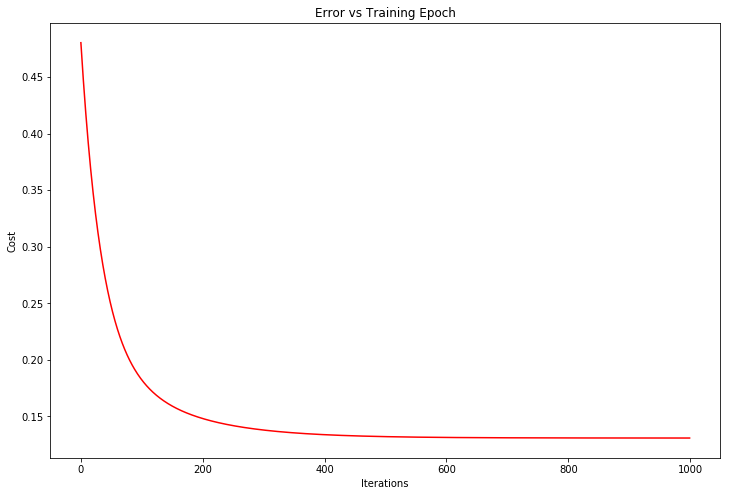

In [77]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')

### The cost (error) of the solution decreases with each training epoch. This shows that gradient descent worked properly and our algorithm worked.